# AirBnb Price Prediction


# Contents

- [Data Cleaning](#data-cleaning)
- [Visualise missing data using heatmap](#visualise-heatmap)
- [Dropping Initial Columns](#dropping-initial-columns)
- [Minimum and maximum nights columns](#nights-columns)
- [Host Related Columns](#host-related-columns)
- [Property Type](#property_type)
- [Bathrooms, Bedrooms, and Beds](#bathrooms-bedrooms-beds)
- [First_review and last_review](#first-last-review)
- [Review Scores](#review_scores)
- [Dealing with outliers in prices](#price-outliers)
- [Amenities](#amenities)
- [Host Response](#host-response)
- [Correlation Analysis](#correlation-analysis)

In [86]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv('06 Nov 2020 listings.csv')

# Data Cleaning <a class="anchor" id="data-cleaning"></a>

In [87]:

pd.set_option("display.max_columns", raw_df.shape[1]) #display all columns
print(raw_df.shape)
raw_df.head()


(76984, 74)


id                         listing_url     scrape_id last_scraped  \
0  11551  https://www.airbnb.com/rooms/11551  2.020110e+13   07/11/2020   
1  13913  https://www.airbnb.com/rooms/13913  2.020110e+13   07/11/2020   
2  15400  https://www.airbnb.com/rooms/15400  2.020110e+13   07/11/2020   
3  17402  https://www.airbnb.com/rooms/17402  2.020110e+13   06/11/2020   
4  17506  https://www.airbnb.com/rooms/17506  2.020110e+13   07/11/2020   

                                                name  \
0         Arty and Bright London Apartment in Zone 2   
1                Holiday London DB Room Let-on going   
2                Bright Chelsea  Apartment. Chelsea!   
3              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
4  Boutique Chelsea/Fulham Double bed 5-star ensuite   

                                         description  \
0  Unlike most rental apartments out there my fla...   
1  My bright double bedroom with a large window h...   
2  Lots of windows and light.  St Luke's Gardens ...   
3  You'll have a wonderful stay in this superb mo...   
4  Enjoy a chic stay in this elegant but fully mo...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   
3  Location, location, location! You won't find b...   
4  Fulham is 'villagey' and residential – a real ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   
3  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
4  https://a0.muscache.com/pictures/11901327/e63d...    67915   

                                  host_url  host_name  host_since  \
0  https://www.airbnb.com/users/show/43039    Adriano  03/10/2009   
1  https://www.airbnb.com/users/show/54730      Alina  16/11/2009   
2  https://www.airbnb.com/users/show/60302   Philippa  05/12/2009   
3  https://www.airbnb.com/users/show/67564        Liz  04/01/2010   
4  https://www.airbnb.com/users/show/67915  Charlotte  05/01/2010   

                         host_location  \
0      London, England, United Kingdom   
1      London, England, United Kingdom   
2  Kensington, England, United Kingdom   
3      London, England, United Kingdom   
4      London, England, United Kingdom   

                                          host_about host_response_time  \
0  Hello, I'm a friendly Italian man with a very ...     within an hour   
1  I am a Multi-Media Visual Artist and Creative ...       within a day   
2  English, grandmother,  I have travelled quite ...       within a day   
3  We are Liz and Jack.  We manage a number of ho...     within an hour   
4  Named best B&B by The Times. Easy going hosts,...                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 f   
1                83%                  71%                 f   
2               100%                 100%                 f   
3                67%                 100%                 t   
4                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/47773...   
1  https://a0.muscache.com/im/users/54730/profile...   
2  https://a0.muscache.com/im/users/60302/profile...   
3  https://a0.muscache.com/im/users/67564/profile...   
4  https://a0.muscache.com/im/users/67915/profile...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/47773...            Brixton   
1  https://a0.muscache.com/im/users/54730/profile...    LB of Islington   
2  https://a0.muscache.com/im/users/60302/profile...            Chelsea   
3  https://a0.musc

# Visualise missing data using heatmap <a class="anchor" id="visualise-heatmap"></a>

Black means data is missing. Beige means data is present. As you can see, there is a lot of missing data.

<AxesSubplot:>

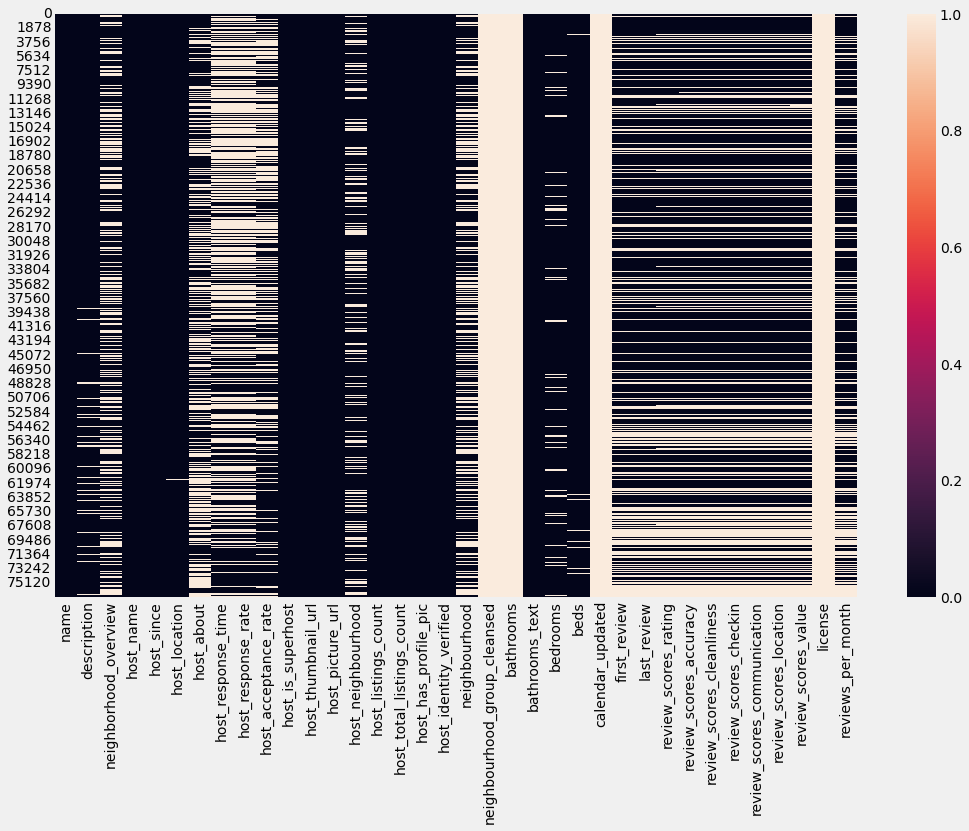

In [88]:
missing_val_cols = raw_df.columns[raw_df.isnull().sum() > 0]
fig, ax = plt.subplots(figsize=(16,10)) 
sns.heatmap(raw_df[missing_val_cols].isnull(), cbar=True)

# Dropping initial columns <a class="anchor" id="dropping-initial-columns"></a>
Natural Language Processing will not be used for price prediction (of course, this is something to consider, but is out of scope in this case). Hence, free text columns will be dropped. The plot above illustrates that we have columns where most of the values are missing. We will drop these columns as well. We will also be dropping the columns related to scraping of this dataset.

In [89]:
to_drop = ['listing_url', 'scrape_id', 'name', 'description', 'neighborhood_overview', 'picture_url',
              'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 
               'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
               'bathrooms', 'calendar_updated', 'calendar_last_scraped', 'license', 'host_picture_url', 
               'host_neighbourhood', 'host_response_time'
              ]

listings = raw_df.drop(to_drop, axis=1)

Print out the sum of missing values for every column. While we've dropped free text columns, we still need to do a lot of work in regards to missing data.

In [90]:
listings.isna().sum().sort_values(ascending=False)

host_response_rate                              37618
host_acceptance_rate                            28432
review_scores_checkin                           23603
review_scores_value                             23602
review_scores_location                          23601
review_scores_accuracy                          23555
review_scores_communication                     23552
review_scores_cleanliness                       23545
review_scores_rating                            23490
first_review                                    21733
last_review                                     21733
reviews_per_month                               21733
bedrooms                                         4746
beds                                             1080
bathrooms_text                                    160
host_total_listings_count                          11
host_identity_verified                             11
host_has_profile_pic                               11
host_listings_count         

# Minimum and maximum nights columns <a class="anchor" id="nights-columns"></a>
We can see that there are multiple columns for minimum and maximum night stays, but we'll only be using two main ones - **minimum_nights** and **maximum_nights**. Multiple columns are presumably due to the fact that minimum or maximum stays vary throughout the year. These columns mostly match the 'default' minimum_nights / maximum_nights columns, so we will drop them.

As a demonstration, below we can see about 85% of the maximum nights across the columns are the same. So it is safe to assume the two main columns are an accurate representation of the data.

In [91]:
print(100 * sum(listings.maximum_nights_avg_ntm == listings.maximum_nights) / len(listings)) 
print(100 * sum(listings.maximum_maximum_nights == listings.maximum_nights) / len(listings))

86.78946274550556
87.77797983996675


In [92]:
listings = listings.drop(['maximum_nights_avg_ntm', 'minimum_minimum_nights', 'minimum_maximum_nights',
                          'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                          'minimum_nights_avg_ntm'], axis=1)

In [93]:
listings.describe().T

count          mean  \
id                                            76984.0  2.562503e+07   
host_id                                       76984.0  9.517164e+07   
host_listings_count                           76973.0  2.359588e+01   
host_total_listings_count                     76973.0  2.359588e+01   
latitude                                      76984.0  5.150993e+01   
longitude                                     76984.0 -1.282558e-01   
accommodates                                  76984.0  3.077393e+00   
bedrooms                                      72238.0  1.487818e+00   
beds                                          75904.0  1.706814e+00   
minimum_nights                                76984.0  5.142120e+00   
maximum_nights                                76984.0  2.073861e+04   
availability_30                               76984.0  1.074096e+01   
availability_60                               76984.0  2.323058e+01   
availability_90                               76984.0  3.689624e+01   
availability_365                              76984.0  1.200420e+02   
number_of_reviews                             76984.0  1.558316e+01   
number_of_reviews_ltm                         76984.0  2.182869e+00   
number_of_reviews_l30d                        76984.0  1.006313e-01   
review_scores_rating                          53494.0  9.310465e+01   
review_scores_accuracy                        53429.0  9.533287e+00   
review_scores_cleanliness                     53439.0  9.292053e+00   
review_scores_checkin                         53381.0  9.653809e+00   
review_scores_communication                   53432.0  9.677272e+00   
review_scores_location                        53383.0  9.559785e+00   
review_scores_value                           53382.0  9.305253e+00   
calculated_host_listings_count                76984.0  1.973475e+01   
calculated_host_listings_count_entire_homes   76984.0  1.688818e+01   
calculated_host_listings_count_private_rooms  76984.0  2.284137e+00   
calculated_host_listings_count_shared_rooms   76984.0  3.990440e-02   
reviews_per_month                             55251.0  6.543646e-01   

                                                       std          min  \
id                                            1.319053e+07  11551.00000   
host_id                                       1.001727e+08   2010.00000   
host_listings_count                           1.243611e+02      0.00000   
host_total_listings_count                     1.243611e+02      0.00000   
latitude                                      4.751437e-02     51.28337   
longitude                                     9.481499e-02     -0.49687   
accommodates                                  1.947671e+00      1.00000   
bedrooms                                      8.849293e-01      1.00000   
beds                                          1.275783e+00      0.00000   
minimum_nights                                2.247701e+01      1.00000   
maximum_nights                                4.070647e+06      1.00000   
availability_30                               1.335310e+01      0.00000   
availability_60                               2.659892e+01      0.00000   
availability_90                               3.982826e+01      0.00000   
availability_365                              1.427342e+02      0.00000   
number_of_reviews                             3.565037e+01      0.00000   
number_of_reviews_ltm                         5.687874e+00      0.00000   
number_of_reviews_l30d                        5.929169e-01      0.00000   
review_scores_rating                          1.036924e+01     20.00000   
review_scores_accuracy                        1.020381e+00      2.00000   
review_scores_cleanliness                     1.174626e+00      2.00000   
review_scores_checkin                         9.194049e-01      2.00000   
review_scores_communication                   9.102331e-01      2.00000   
review_scores_location                        

In [94]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76984 non-null  int64  
 1   last_scraped                                  76984 non-null  object 
 2   host_id                                       76984 non-null  int64  
 3   host_since                                    76973 non-null  object 
 4   host_response_rate                            39366 non-null  object 
 5   host_acceptance_rate                          48552 non-null  object 
 6   host_is_superhost                             76973 non-null  object 
 7   host_listings_count                           76973 non-null  float64
 8   host_total_listings_count                     76973 non-null  float64
 9   host_has_profile_pic                          76973 non-null 

Let's check if boolean and numeric columns have enough varibility to make them worth including

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_listings_count'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>,
        <AxesSubplot:title={'center':'host_has_profile_pic'}>],
       [<AxesSubplot:title={'center':'host_identity_verified'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'has_availability'}>,
        <AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'av

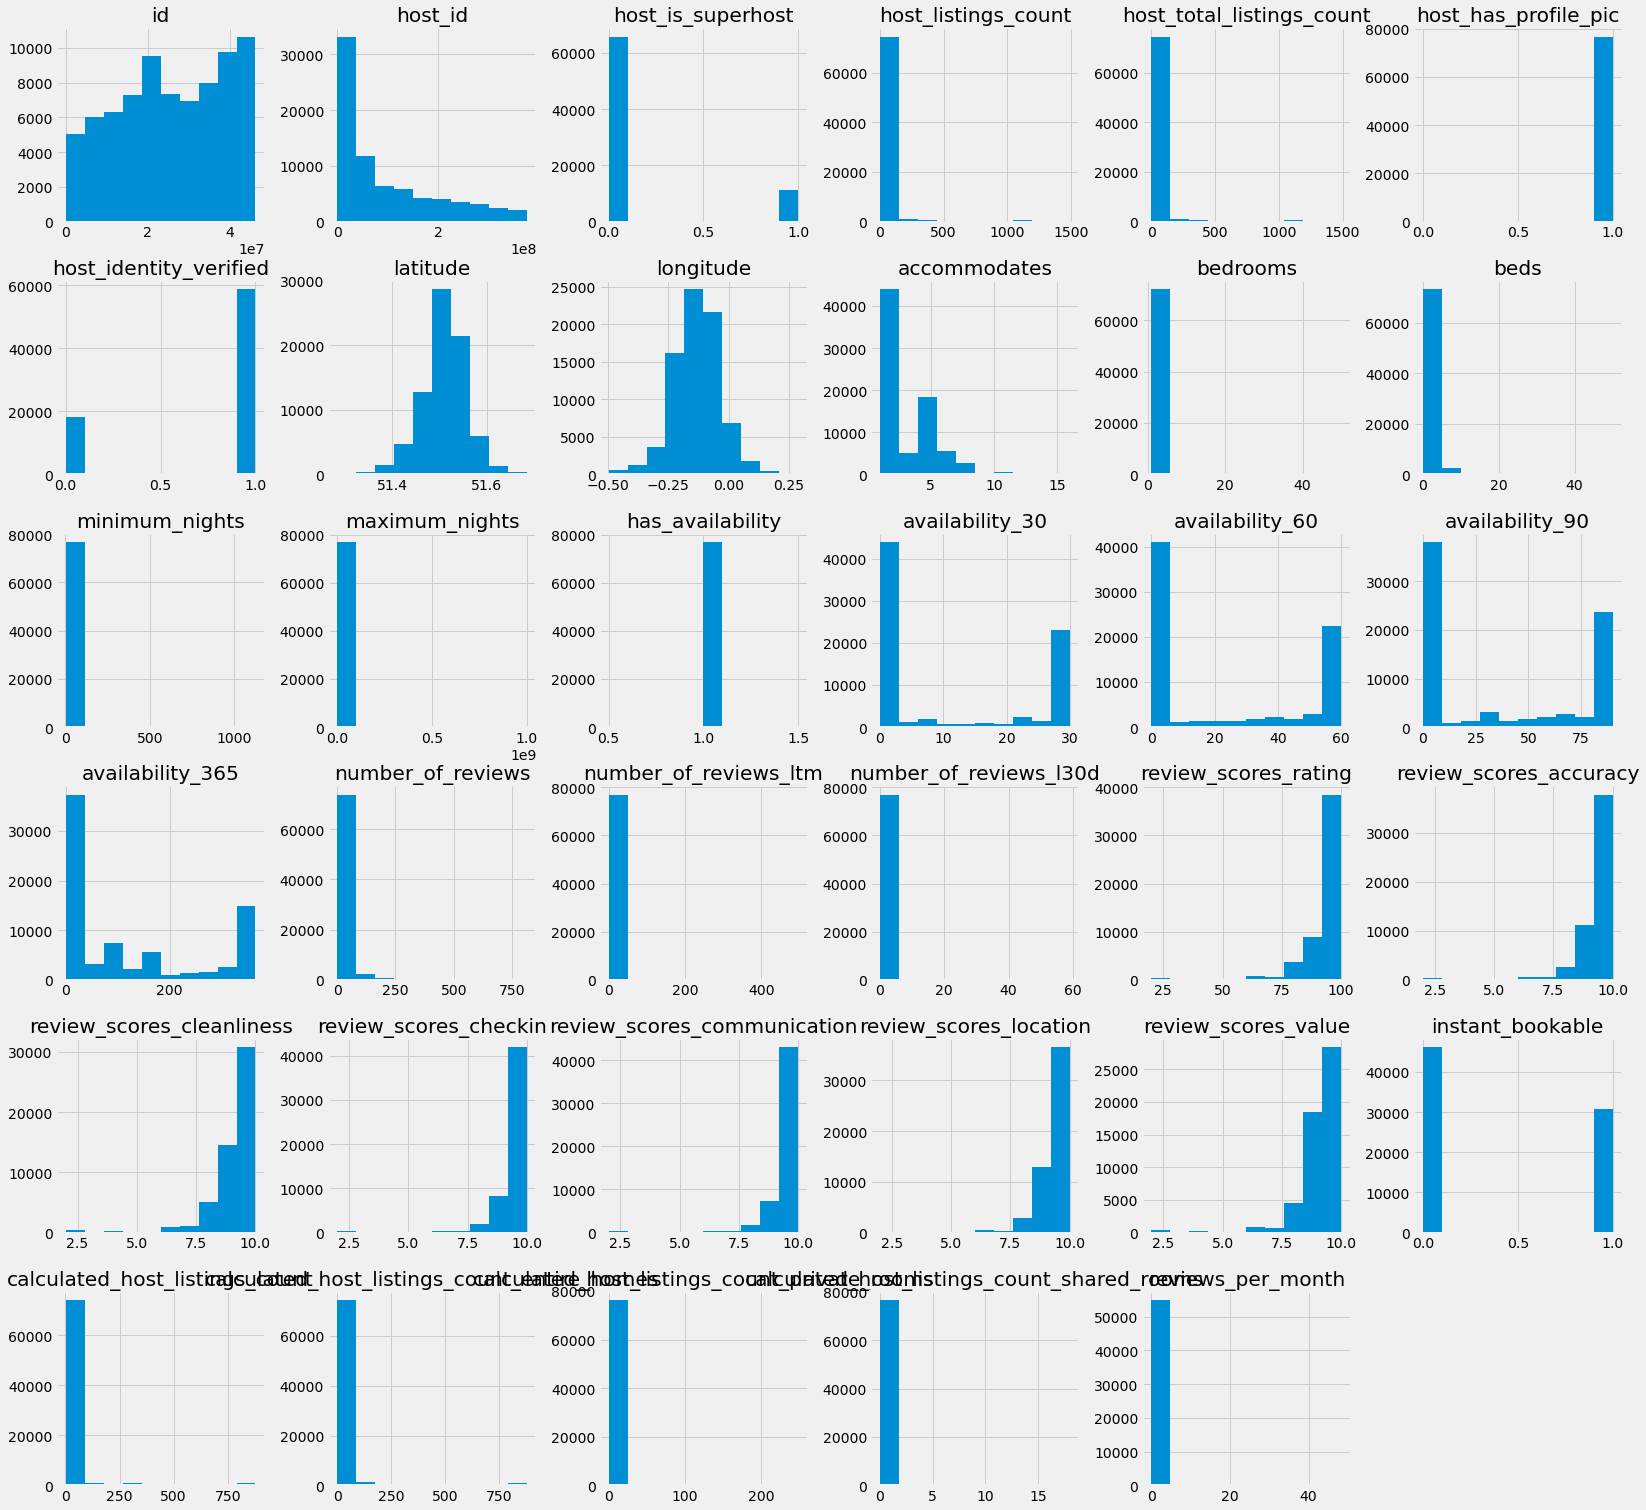

In [95]:
# Replace columns with categorical values t and f with 1 and 0
listings = listings.replace({'f': 0, 't': 1})

# Plot the histogram of numerical and boolean columns
listings.hist(figsize=(25, 25))

From the above, it can be seen that Column **has_availability** contains only one category.

There is very little variability in **calculated_host_listings_count_shared_rooms** columns.

So we will be dropping these columns

In [96]:
listings = listings.drop(['has_availability', 'calculated_host_listings_count_shared_rooms'], axis=1)

We further cleaned the data by removing special characters and converting to float **host_response_rate**, **host_acceptance_rate**, **bathrooms_text** and **price**. We also renamed **bathrooms_text** to **bathrooms**.

In [97]:
# Lambda function to remove special characters and convert to float
strip_and_convert = lambda col: col.str.extract('(\d+)', expand=False).astype(float, errors='ignore')

# strip_and_convert function wil be applied on the below columns
cols_to_numeric = ['host_response_rate', 'host_acceptance_rate', 'bathrooms_text', 'price']
listings[cols_to_numeric] = listings[cols_to_numeric].apply(strip_and_convert)
# Rename bathrooms_text column
listings = listings.rename(columns={'bathrooms_text': 'bathrooms'})
print(listings.shape)
listings.head()

(76984, 45)


id last_scraped  host_id  host_since  host_response_rate  \
0  11551   07/11/2020    43039  03/10/2009               100.0   
1  13913   07/11/2020    54730  16/11/2009                83.0   
2  15400   07/11/2020    60302  05/12/2009               100.0   
3  17402   06/11/2020    67564  04/01/2010                67.0   
4  17506   07/11/2020    67915  05/01/2010                 NaN   

   host_acceptance_rate  host_is_superhost  host_listings_count  \
0                 100.0                0.0                  3.0   
1                  71.0                0.0                  3.0   
2                 100.0                0.0                  1.0   
3                 100.0                1.0                 18.0   
4                   NaN                0.0                  3.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        3.0                   1.0                     1.0   
1                        3.0                   1.0                     1.0   
2                        1.0                   1.0                     1.0   
3                       18.0                   1.0                     1.0   
4                        3.0                   1.0                     1.0   

   neighbourhood_cleansed  latitude  longitude  \
0                 Lambeth  51.46225   -0.11732   
1               Islington  51.56802   -0.11121   
2  Kensington and Chelsea  51.48796   -0.16898   
3             Westminster  51.52195   -0.14094   
4  Hammersmith and Fulham  51.47935   -0.19743   

                       property_type        room_type  accommodates  \
0                   Entire apartment  Entire home/apt             4   
1          Private room in apartment     Private room             2   
2                   Entire apartment  Entire home/apt             2   
3                   Entire apartment  Entire home/apt             6   
4  Private room in bed and breakfast     Private room             2   

   bathrooms  bedrooms  beds  \
0        1.0       1.0   3.0   
1        1.0       1.0   0.0   
2        1.0       1.0   1.0   
3        2.0       3.0   3.0   
4        1.0       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Cable TV", "Coffee maker", "Carbon monoxide ...   97.0               7   
1  ["Cable TV", "Bed linens", "Coffee maker", "Pa...   40.0               1   
2  ["Cable TV", "Coffee maker", "Dryer", "Dishes ...   75.0              10   
3  ["Bed linens", "Coffee maker", "Dryer", "Paid ...  307.0               4   
4  ["TV", "Heating", "Shower gel", "Wifi", "Smoke...  150.0               3   

   maximum_nights  availability_30  availability_60  availability_90  \
0             190                0                0                4   
1              29               30               60               90   
2              50                0               20               50   
3             365               25               55               85   
4              21               29               59               89   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               279                192                      7   
1               365                 21                      2   
2               150                 89                      1   
3               330                 42                      0   
4               364                  0                      0   

   number_of_reviews_l30d first_review last_review  review_scores_rating  \
0                       0   21/03/2010  26/03/2020                  91.0   
1                       0   18/08/2010  22/02/2020                  97.0   
2                       0   21/12/2009  16/03/2020                  96.0   
3                       0   21/03/2011  02/11/2019                  94.0   
4                       0          NaN         NaN                   NaN   

   review_scores_accuracy  review_scores_cleanliness  review

# Host related columns <a class="anchor" id="host-related-columns"></a>
As seen from the output below, there are 11 rows with missing values in some host related columns.

In [98]:
listings[['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified']].isnull().sum()

host_since                11
host_is_superhost         11
host_listings_count       11
host_has_profile_pic      11
host_identity_verified    11
dtype: int64

Since it's a small number, we will drop these rows.

In [99]:
listings = listings.dropna(subset=['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'], axis=0)

listings[['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified']].isnull().sum()

host_since                0
host_is_superhost         0
host_listings_count       0
host_has_profile_pic      0
host_identity_verified    0
dtype: int64

In addition, the **host_since** column contains dates in the format **YYYY-MM-DD**.

To be able to use the column in our model, we will transform the **host_since** column to numerical: the new column will be the difference (in days) between the date the dataset was scraped and host_since column.

In [100]:
# Convert to datetime object
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['host_since'] = pd.to_datetime(listings['host_since'])

#Created a new feature to calculate the difference in days:
listings['days_host_since'] = (listings['last_scraped'] - listings['host_since']).dt.days

# Remove host_since and other unnecessary columns
listings = listings.drop(['host_since', 'id', 'host_id'], axis=1)

listings['days_host_since'].describe()
listings.head()

last_scraped  host_response_rate  host_acceptance_rate  host_is_superhost  \
0   2020-07-11               100.0                 100.0                0.0   
1   2020-07-11                83.0                  71.0                0.0   
2   2020-07-11               100.0                 100.0                0.0   
3   2020-06-11                67.0                 100.0                1.0   
4   2020-07-11                 NaN                   NaN                0.0   

   host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                  3.0                        3.0                   1.0   
1                  3.0                        3.0                   1.0   
2                  1.0                        1.0                   1.0   
3                 18.0                       18.0                   1.0   
4                  3.0                        3.0                   1.0   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
0                     1.0                 Lambeth  51.46225   -0.11732   
1                     1.0               Islington  51.56802   -0.11121   
2                     1.0  Kensington and Chelsea  51.48796   -0.16898   
3                     1.0             Westminster  51.52195   -0.14094   
4                     1.0  Hammersmith and Fulham  51.47935   -0.19743   

                       property_type        room_type  accommodates  \
0                   Entire apartment  Entire home/apt             4   
1          Private room in apartment     Private room             2   
2                   Entire apartment  Entire home/apt             2   
3                   Entire apartment  Entire home/apt             6   
4  Private room in bed and breakfast     Private room             2   

   bathrooms  bedrooms  beds  \
0        1.0       1.0   3.0   
1        1.0       1.0   0.0   
2        1.0       1.0   1.0   
3        2.0       3.0   3.0   
4        1.0       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Cable TV", "Coffee maker", "Carbon monoxide ...   97.0               7   
1  ["Cable TV", "Bed linens", "Coffee maker", "Pa...   40.0               1   
2  ["Cable TV", "Coffee maker", "Dryer", "Dishes ...   75.0              10   
3  ["Bed linens", "Coffee maker", "Dryer", "Paid ...  307.0               4   
4  ["TV", "Heating", "Shower gel", "Wifi", "Smoke...  150.0               3   

   maximum_nights  availability_30  availability_60  availability_90  \
0             190                0                0                4   
1              29               30               60               90   
2              50                0               20               50   
3             365               25               55               85   
4              21               29               59               89   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               279                192                      7   
1               365                 21                      2   
2               150                 89                      1   
3               330                 42                      0   
4               364                  0                      0   

   number_of_reviews_l30d first_review last_review  review_scores_rating  \
0                       0   21/03/2010  26/03/2020                  91.0   
1                       0   18/08/2010  22/02/2020                  97.0   
2                       0   21/12/2009  16/03/2020                  96.0   
3                       0   21/03/2011  02/11/2019                  94.0   
4                       0          NaN         NaN                   NaN   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     9.0                        9.0                   10.0   
1                    10.0                       10.0                   10.0   
2                 

# Property Type <a class="anchor" id="property_type"></a>
We also need to perform some cleaning in property_type columns as there are too many categories whilst the majority of property types (~80%) belong to 3 categories only, i.e. Entire apartment, Private room in apartment and Private room in house.

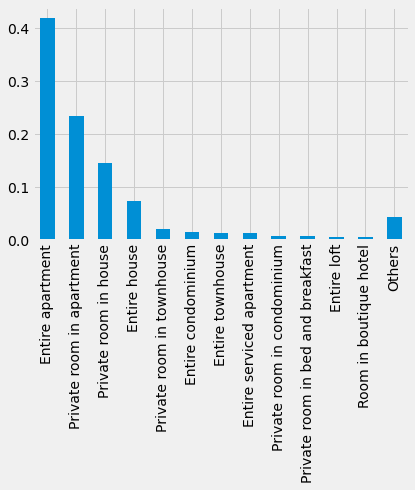

Property types: ['Entire apartment', 'Private room in apartment', 'Private room in house'] make up 79.75 % of the total property types


In [101]:
prob = listings['property_type'].value_counts(normalize=True)
# Setting a threshold. This threshold means that if the frequency of the property types that is less than this value, they will be categorised as 'Others'
threshold = 0.005
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Others'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

print("Property types: {} make up {} % of the total property types".format(
    list(prob[:3].index), 
    round(prob[:3].sum(), 4) * 100
))

In [102]:
# Replace with Other if the frequency of the category is below set threshold (we set it at 0.005, refer to above) 
listings.loc[~listings['property_type'].isin(prob.index.drop('Others')), 'property_type'] = 'Others'
listings['property_type'].value_counts()

Entire apartment                     32299
Private room in apartment            17952
Private room in house                11136
Entire house                          5635
Others                                3283
Private room in townhouse             1552
Entire condominium                    1171
Entire townhouse                       976
Entire serviced apartment              966
Private room in condominium            622
Private room in bed and breakfast      524
Entire loft                            429
Room in boutique hotel                 428
Name: property_type, dtype: int64

# Bathrooms, bedrooms and beds <a class="anchor" id="bathrooms-bedrooms-beds"></a>
Since these are integer values, the missing values will be replaced with median

In [103]:
fill_median = lambda col: col.fillna(col.median())
listings[['bathrooms', 'bedrooms', 'beds']] = listings[['bathrooms', 'bedrooms', 'beds']].apply(fill_median)

listings[['bathrooms', 'bedrooms', 'beds']].isnull().sum()

bathrooms    0
bedrooms     0
beds         0
dtype: int64

# First_review and last_review <a class="anchor" id="first-last-review"></a>
More than 28% of the listings do not have any reviews. This is too many rows to drop. Furthermore, inputing the missing values is also not the best idea since this may skew the distribution significantly. However, the fact that there are missing values may give us meaningful information. This explains that listings with missing values are new bookings that have not yet have reviews. Hence, these values will be kept and will be categorised as 'No reviews'. These columns will be transformed to categorical

In [104]:
100 * listings[['first_review', 'last_review']].isnull().sum() / len(listings)

first_review    28.225482
last_review     28.225482
dtype: float64

In [105]:
listings['first_review'].isnull().sum()

21726

In [106]:
listings['last_review'].isnull().sum()

21726

In [107]:
# Convert to datetime object
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])

# New feature to calculate number of days between review date and the date the dataset was scrapped
listings['days_since_first_review'] = (listings['last_scraped'] - listings['first_review'])
listings['days_since_last_review'] = (listings['last_scraped'] - listings['last_review'])

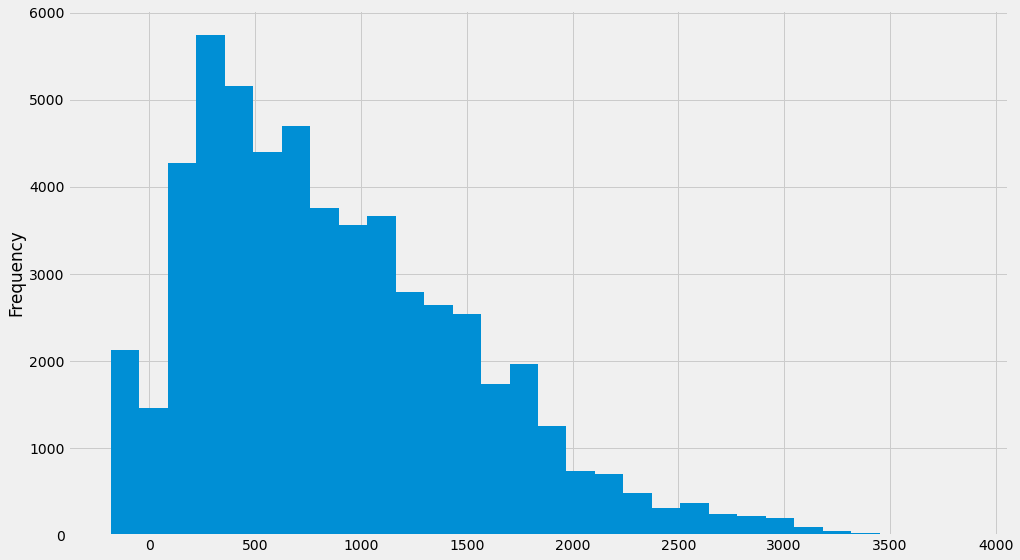

In [108]:
from datetime import datetime, timedelta

plt.style.use('fivethirtyeight')

listings['days_since_first_review'].dt.days.plot(kind='hist', bins=30, figsize=(15,9));
def categorise_col(col_name, new_col, bins, labels):
    listings[new_col] = pd.cut(listings[col_name], bins, labels=labels)
    listings[new_col] = listings[new_col].astype('str')
    listings[new_col] = listings[new_col].str.replace('nan', 'No reviews')
    listings[new_col] = listings[new_col].astype('category')
    
bins = pd.to_timedelta([0, 182, 365, 730, 1460, max(listings['days_since_first_review'])], unit='days')
labels = ['0-6 months',
           '6-12 months',
           '1-2 years',
           '2-3 years',
           '4+ years']
categorise_col('days_since_first_review', 'days_since_first_review_cats', bins, labels)

In [109]:
listings.days_since_last_review

0       107 days
1       140 days
2       117 days
3       486 days
4            NaT
          ...   
76979        NaT
76980        NaT
76981        NaT
76982        NaT
76983        NaT
Name: days_since_last_review, Length: 76973, dtype: timedelta64[ns]

0

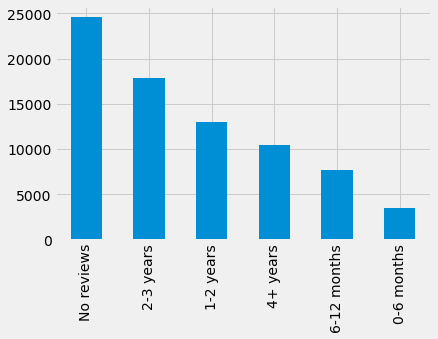

In [110]:
listings['days_since_first_review_cats'].value_counts().plot(kind='bar')
listings['days_since_first_review_cats'].isnull().sum()

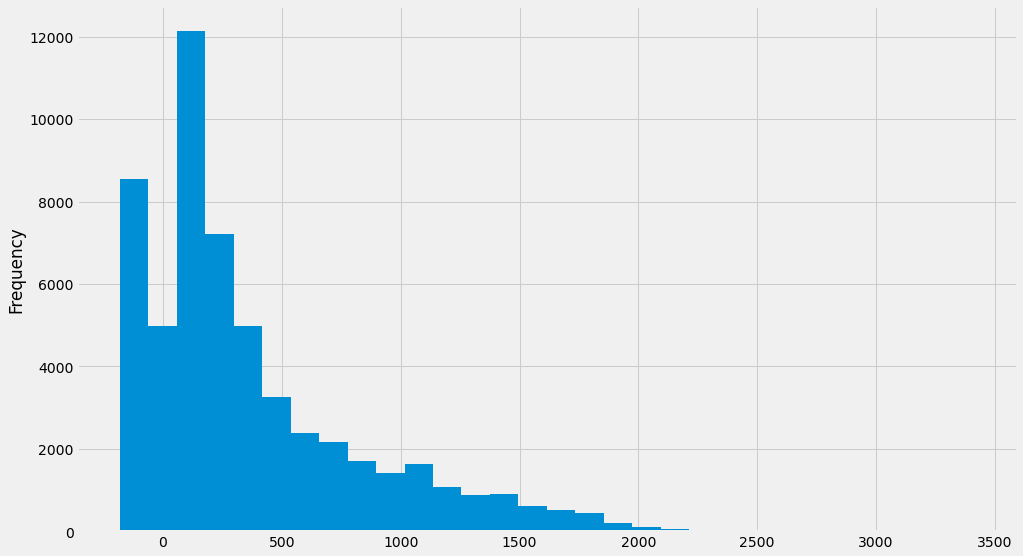

In [111]:
listings['days_since_last_review'].dt.days.plot(kind='hist', bins=30, figsize=(15,9));

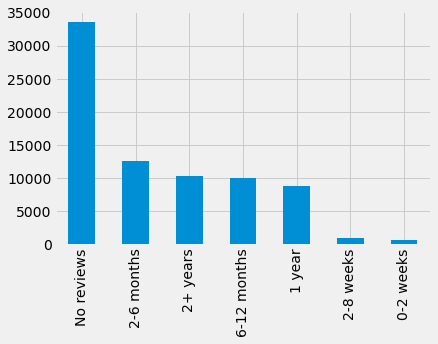

In [112]:
bins2 = pd.to_timedelta([0, 14, 60, 182, 365, 730, max(listings['days_since_last_review'])], unit='days')
labels2 = ['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1 year', '2+ years']

categorise_col('days_since_last_review', 'days_since_last_review_cats', bins=bins2, labels=labels2)
listings['days_since_last_review_cats'].value_counts().plot(kind='bar');
listings['days_since_last_review_cats'].isnull().sum();

# # Storing the first_review column in a variable for Exploratory Data Analysis
# first_review = listings['first_review']
# review_scores_rating = listings['review_scores_rating']

In [113]:
listings['days_since_last_review'].isnull().sum()

21726

# Review scores columns <a class="anchor" id="review_scores"></a>
Like above, ratings without reviews will be replaced by No reviews value, and we will also categorise these columns. The histrograms below will be a useful reference for us to decide on bins. Most of the ratings are above 9 points out of 10. reviews_scores_rating is a mean of other columns multiplied by 100 to represent the ratings in percentage.

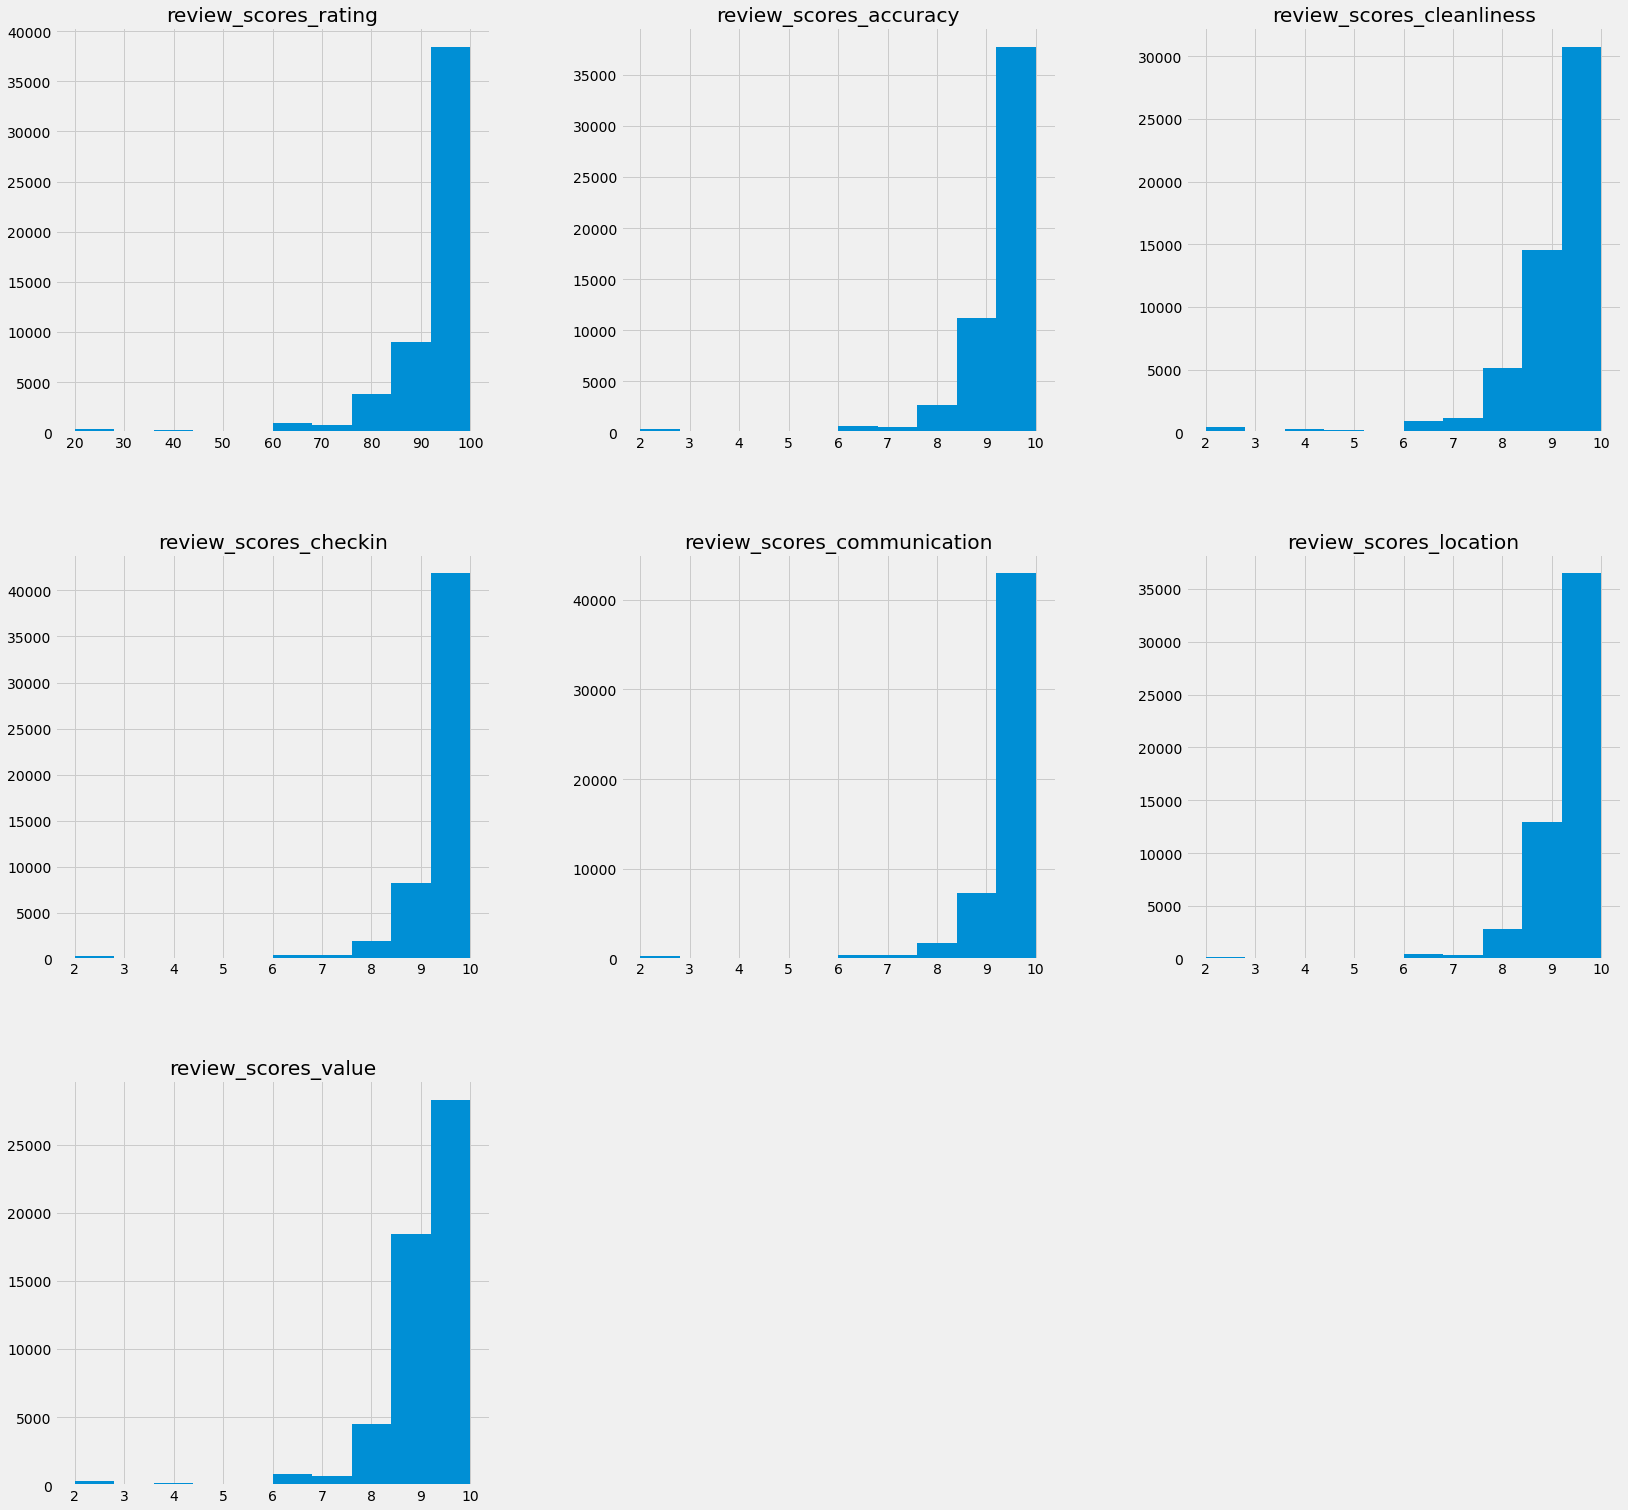

In [114]:
listings.isnull().sum().sort_values(ascending=False)
review_cols = listings.columns[listings.columns.str.startswith("review_scores")]
listings[review_cols].hist(figsize=(25, 25));

In [115]:
# Categorising columns out of 10
review_cols_10 = ['review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
new_cols_10 = [s + "_cats" for s in review_cols_10]
bins3 = [0, 8, 9, 10]
labels3 = ['0-8/10', '9/10', '10/10']

for i, col in enumerate(review_cols_10):
    categorise_col(col, new_cols_10[i], bins=bins3, labels=labels3)

# Categorising column out of 10
categorise_col('review_scores_rating', 'review_scores_rating_cat', 
               bins=[0, 80, 95, 100], 
               labels=['0-79/100', '80-94/100', '95-100/100'])

# Dealing with outliers in prices <a class="anchor" id="price-outliers"></a>
Around 2.1% of listings' prices are greater than 4 times the standard deviation of price. So we will remove the rows with values greater than that.

Mean price: £ 100.05314850661921
Standard Deviation of Price: £ 94.79769234126957
Four times Standard Deviation: £ 379.19076936507827
Number of outliers:  922
Percentage greater than 4X standard deviation:  2.1786860327647357


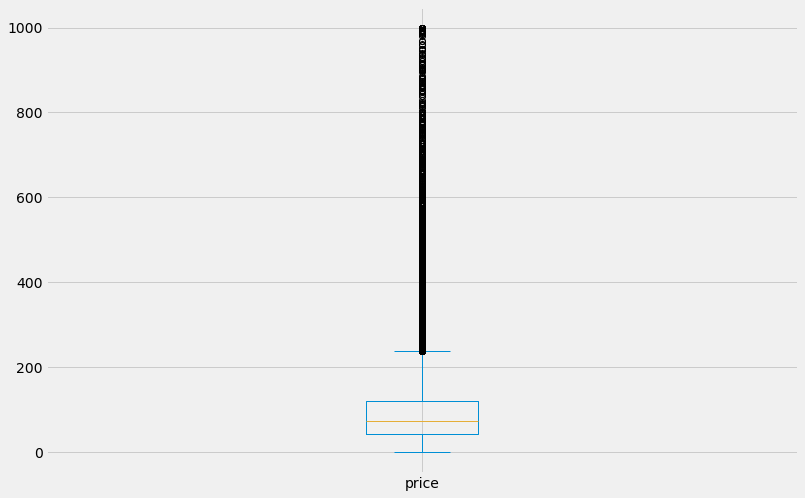

In [116]:
listings['price'].plot(kind='box', figsize=(12, 8));

meanPrice = listings['price'].mean()
stdDevPrice = listings['price'].std()
print('Mean price: £', meanPrice)
print('Standard Deviation of Price: £', stdDevPrice)
print('Four times Standard Deviation: £', 4 *stdDevPrice)

outliers = abs(listings['price'] - meanPrice) > 4 * stdDevPrice

print('Number of outliers: ', outliers.sum())

#6 *std = 568.7611414677139 plus mean = 668 ==> there's 306 above this price
#5 *std = 473.9676178897616 plus mean = 573 ==> there's 477 above this price
#4 *std = 379.17409431180926 plus mean = 479 ==> there's 922 above this price
#3.5 *std = 284.3805707338569 plus mean = 384 ==> there's 1641 above this price
print('Percentage greater than 4X standard deviation: ', 100 * (len(listings[listings['price'] > 379]) / len(listings)))

listings = listings[listings['price'] < 379]

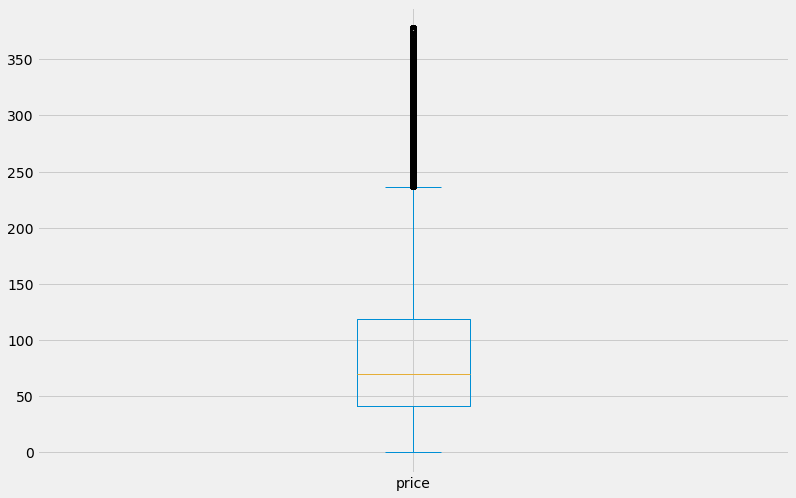

In [117]:
listings['price'].plot(kind='box', figsize=(12, 8));

# Amenities <a class="anchor" id="amenities"></a>
Given that amenities are stored in a list, we will split the amenities and one-hot encoding them

In [118]:
import re
    
def one_hot_encode_amenities(df):
    '''
    INPUT: 
    df - Original dataframe
    OUTPUT: 
    df_amenities - One-hot encoded dataframe of amenities
        
    Create dummies from list of amenities
    
    '''
    def clean_amenities(row):
        '''
        Remove special characters and split the strings
        '''
        row = re.sub('[^A-Za-z,]+', '', row).split(",")
        return row
        
    df['amenities'] = df['amenities'].apply(clean_amenities)
    
    # Create columns from list of amenities
    df_amenities = df.amenities.str.join('|').str.get_dummies().add_prefix('amenity')
        
    # Include only those amenities that are found in >5% of the listings
    df_amenities = df_amenities[df_amenities.columns[df_amenities.sum() > 0.05 * len(df_amenities)]]
        
    return df_amenities

In [119]:
listings.amenities[5]

'["Coffee maker", "Heating", "Free street parking", "Wifi", "Kitchen", "Smoke alarm", "Washer", "Essentials", "Iron", "Lock on bedroom door", "Hair dryer", "Shampoo", "Hangers", "Laptop-friendly workspace"]'

In [120]:
amenities_df = one_hot_encode_amenities(listings)


In [121]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75287 entries, 0 to 76983
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   last_scraped                                  75287 non-null  datetime64[ns] 
 1   host_response_rate                            38188 non-null  float64        
 2   host_acceptance_rate                          47337 non-null  float64        
 3   host_is_superhost                             75287 non-null  float64        
 4   host_listings_count                           75287 non-null  float64        
 5   host_total_listings_count                     75287 non-null  float64        
 6   host_has_profile_pic                          75287 non-null  float64        
 7   host_identity_verified                        75287 non-null  float64        
 8   neighbourhood_cleansed                        75287 non-

In [82]:
listings.shape

(75287, 54)

In [192]:
# Remove amenities column
listings = listings.drop(['amenities'], axis=1)

#Concatenate dataframes
listings = pd.concat([listings, amenities_df], axis=1)

In [193]:
print(listings.shape)
listings.head()

(75287, 100)


last_scraped  host_response_rate  host_acceptance_rate  host_is_superhost  \
0   2020-07-11               100.0                 100.0                0.0   
1   2020-07-11                83.0                  71.0                0.0   
2   2020-07-11               100.0                 100.0                0.0   
3   2020-06-11                67.0                 100.0                1.0   
4   2020-07-11                 NaN                   NaN                0.0   

   host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                  3.0                        3.0                   1.0   
1                  3.0                        3.0                   1.0   
2                  1.0                        1.0                   1.0   
3                 18.0                       18.0                   1.0   
4                  3.0                        3.0                   1.0   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
0                     1.0                 Lambeth  51.46225   -0.11732   
1                     1.0               Islington  51.56802   -0.11121   
2                     1.0  Kensington and Chelsea  51.48796   -0.16898   
3                     1.0             Westminster  51.52195   -0.14094   
4                     1.0  Hammersmith and Fulham  51.47935   -0.19743   

                       property_type        room_type  accommodates  \
0                   Entire apartment  Entire home/apt             4   
1          Private room in apartment     Private room             2   
2                   Entire apartment  Entire home/apt             2   
3                   Entire apartment  Entire home/apt             6   
4  Private room in bed and breakfast     Private room             2   

   bathrooms  bedrooms  beds  price  minimum_nights  maximum_nights  \
0        1.0       1.0   3.0   97.0               7             190   
1        1.0       1.0   0.0   40.0               1              29   
2        1.0       1.0   1.0   75.0              10              50   
3        2.0       3.0   3.0  307.0               4             365   
4        1.0       1.0   1.0  150.0               3              21   

   availability_30  availability_60  availability_90  availability_365  \
0                0                0                4               279   
1               30               60               90               365   
2                0               20               50               150   
3               25               55               85               330   
4               29               59               89               364   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                192                      7                       0   
1                 21                      2                       0   
2                 89                      1                       0   
3                 42                      0                       0   
4                  0                      0                       0   

  first_review last_review  review_scores_rating  review_scores_accuracy  \
0   2010-03-21  2020-03-26                  91.0                     9.0   
1   2010-08-18  2020-02-22                  97.0                    10.0   
2   2009-12-21  2020-03-16                  96.0                    10.0   
3   2011-03-21  2019-02-11                  94.0                    10.0   
4          NaT         NaT                   NaN                     NaN   

   review_scores_cleanliness  review_scores_checkin  \
0                        9.0                   10.0   
1                       10.0                   10.0   
2                       10.0                   10.0   
3                        9.0                    9.0   
4                        NaN                    NaN   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0        

In [42]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75287 entries, 0 to 76983
Data columns (total 93 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   last_scraped                                  75287 non-null  datetime64[ns] 
 1   host_response_rate                            38188 non-null  float64        
 2   host_acceptance_rate                          47337 non-null  float64        
 3   host_is_superhost                             75287 non-null  float64        
 4   host_listings_count                           75287 non-null  float64        
 5   host_total_listings_count                     75287 non-null  float64        
 6   host_has_profile_pic                          75287 non-null  float64        
 7   host_identity_verified                        75287 non-null  float64        
 8   neighbourhood_cleansed                        75287 non-

# Host_response_rate, host_acceptance_rate, reviews_per_month <a class="anchor" id="host-response"></a>
Empty host_response_rate, host_acceptance_rate, reviews_per_month will be filled by mean values

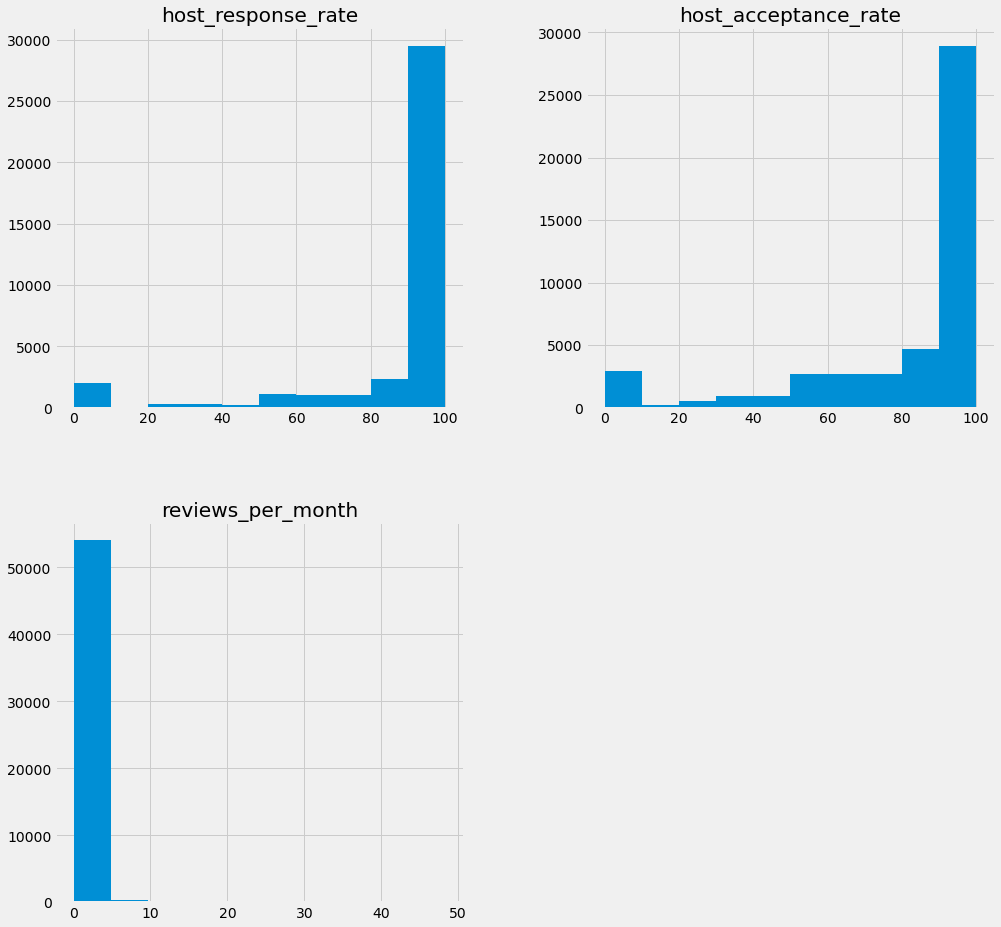

In [194]:
fill_mean = lambda col: col.fillna(col.mean())
listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']].hist(figsize=(15, 15));
listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']] = listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']].apply(fill_mean)

In [57]:
# pd.set_option('max_columns', None)
listings.head()
# pd.reset_option("max_columns")

last_scraped  host_response_rate  host_acceptance_rate  host_is_superhost  \
0   2020-07-11          100.000000            100.000000                0.0   
1   2020-07-11           83.000000             71.000000                0.0   
2   2020-07-11          100.000000            100.000000                0.0   
3   2020-06-11           67.000000            100.000000                1.0   
4   2020-07-11           87.778831             81.330735                0.0   

   host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                  3.0                        3.0                   1.0   
1                  3.0                        3.0                   1.0   
2                  1.0                        1.0                   1.0   
3                 18.0                       18.0                   1.0   
4                  3.0                        3.0                   1.0   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
0                     1.0                 Lambeth  51.46225   -0.11732   
1                     1.0               Islington  51.56802   -0.11121   
2                     1.0  Kensington and Chelsea  51.48796   -0.16898   
3                     1.0             Westminster  51.52195   -0.14094   
4                     1.0  Hammersmith and Fulham  51.47935   -0.19743   

                       property_type        room_type  accommodates  \
0                   Entire apartment  Entire home/apt             4   
1          Private room in apartment     Private room             2   
2                   Entire apartment  Entire home/apt             2   
3                   Entire apartment  Entire home/apt             6   
4  Private room in bed and breakfast     Private room             2   

   bathrooms  bedrooms  beds  price  minimum_nights  maximum_nights  \
0        1.0       1.0   3.0   97.0               7             190   
1        1.0       1.0   0.0   40.0               1              29   
2        1.0       1.0   1.0   75.0              10              50   
3        2.0       3.0   3.0  307.0               4             365   
4        1.0       1.0   1.0  150.0               3              21   

   availability_30  availability_60  availability_90  availability_365  \
0                0                0                4               279   
1               30               60               90               365   
2                0               20               50               150   
3               25               55               85               330   
4               29               59               89               364   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                192                      7                       0   
1                 21                      2                       0   
2                 89                      1                       0   
3                 42                      0                       0   
4                  0                      0                       0   

  first_review last_review  review_scores_rating  review_scores_accuracy  \
0   2010-03-21  2020-03-26                  91.0                     9.0   
1   2010-08-18  2020-02-22                  97.0                    10.0   
2   2009-12-21  2020-03-16                  96.0                    10.0   
3   2011-03-21  2019-02-11                  94.0                    10.0   
4          NaT         NaT                   NaN                     NaN   

   review_scores_cleanliness  review_scores_checkin  \
0                        9.0                   10.0   
1                       10.0                   10.0   
2                       10.0                   10.0   
3                        9.0                    9.0   
4                        NaN                    NaN   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0        

In [195]:
# Dropping initial and intermidiate columns
review_cols = listings.columns[listings.columns.str.startswith("review_scores")]
listings = listings.drop(review_cols, axis=1)
listings = listings.drop(columns=['last_review', 
                                  'days_since_last_review', 'days_since_first_review', 
                                  'first_review', 'last_scraped','host_listings_count'])

# Include all object and category columns
cat_columns = listings.select_dtypes(include=['object', 'category']).columns
for col in cat_columns:    
    listings = pd.concat([listings.drop(col, axis=1), pd.get_dummies(listings[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)   

In [198]:
listings.head().T

0           1  \
host_response_rate                                100.00000    83.00000   
host_acceptance_rate                              100.00000    71.00000   
host_is_superhost                                   0.00000     0.00000   
host_total_listings_count                           3.00000     3.00000   
host_has_profile_pic                                1.00000     1.00000   
host_identity_verified                              1.00000     1.00000   
latitude                                           51.46225    51.56802   
longitude                                          -0.11732    -0.11121   
accommodates                                        4.00000     2.00000   
bathrooms                                           1.00000     1.00000   
bedrooms                                            1.00000     1.00000   
beds                                                3.00000     0.00000   
price                                              97.00000    40.00000   
minimum_nights                                      7.00000     1.00000   
maximum_nights                                    190.00000    29.00000   
availability_30                                     0.00000    30.00000   
availability_60                                     0.00000    60.00000   
availability_90                                     4.00000    90.00000   
availability_365                                  279.00000   365.00000   
number_of_reviews                                 192.00000    21.00000   
number_of_reviews_ltm                               7.00000     2.00000   
number_of_reviews_l30d                              0.00000     0.00000   
instant_bookable                                    1.00000     0.00000   
calculated_host_listings_count                      2.00000     2.00000   
calculated_host_listings_count_entire_homes         2.00000     1.00000   
calculated_host_listings_count_private_rooms        0.00000     1.00000   
reviews_per_month                                   1.48000     0.17000   
days_host_since                                  4141.00000  3890.00000   
amenity_Air_conditioning_                           0.00000     0.00000   
amenity_Bathtub_                                    0.00000     1.00000   
amenity_Bed_linens_                                 0.00000     1.00000   
amenity_Breakfast_                                  0.00000     0.00000   
amenity_Cable_TV_                                   1.00000     1.00000   
amenity_Carbon_monoxide_alarm_                      1.00000     1.00000   
amenity_Coffee_maker_                               1.00000     1.00000   
amenity_Cooking_basics_                             1.00000     1.00000   
amenity_Dishes_and_silverware_                      1.00000     1.00000   
amenity_Dishwasher_                                 0.00000     0.00000   
amenity_Dryer_                                      0.00000     1.00000   
amenity_Elevator_                                   0.00000     0.00000   
amenity_Essentials_                                 1.00000     1.00000   
amenity_Extra_pillows_and_blankets_                 0.00000     1.00000   
amenity_Fire_extinguisher_                          1.00000     1.00000   
amenity_First_aid_kit_                              0.00000     0.00000   
amenity_Free_parking_on_premises_                   0.00000     0.00000   
amenity_Free_street_parking_                        0.00000     1.00000   
amenity_Garden_or_backyard_                         0.00000     0.00000   
amenity_Hair_dryer_                                 1.00000     1.00000   
amenity_Hangers_                                    1.00000     1.00000   
amenity_Heating_                                    1.00000     1.00000   
amenity_Host_greets_you_                            0.00000     1.00000   
amenity_Hot_water_                                  1.00000     1.00000   
amenity_Indoor_fireplace_                           0.00000     0.00000   
amenity_

In [202]:
listings.shape

(75287, 131)

# Pearson correlation with Price

In [203]:
dfc = pd.DataFrame(listings.corr(method="pearson")["price"])
dfc.reset_index(inplace=True)
dfc.columns = ["features", "correlation_with_price"]
dfc.sort_values("correlation_with_price", ascending=False)
df1 = dfc[dfc["correlation_with_price"] > 0.1]
corr_features = df1["features"].values
corr_features.tolist().append("price")
print(df1.shape)
df1

(33, 2)


features  correlation_with_price
3                        host_total_listings_count                0.220380
5                           host_identity_verified                0.109790
8                                     accommodates                0.599245
9                                        bathrooms                0.356858
10                                        bedrooms                0.542839
11                                            beds                0.483499
12                                           price                1.000000
23                  calculated_host_listings_count                0.228065
24     calculated_host_listings_count_entire_homes                0.242251
28                       amenity_Air_conditioning_                0.126067
29                                amenity_Bathtub_                0.141071
32                               amenity_Cable_TV_                0.140637
34                           amenity_Coffee_maker_                0.144614
36                  amenity_Dishes_and_silverware_                0.126237
37                             amenity_Dishwasher_                0.254802
38                                  amenity_Dryer_                0.212213
47                             amenity_Hair_dryer_                0.135663
52                       amenity_Indoor_fireplace_                0.124494
53                                   amenity_Iron_                0.161493
54                                amenity_Kitchen_                0.115458
60                              amenity_Microwave_                0.114091
61                                   amenity_Oven_                0.147779
63                       amenity_Patio_or_balcony_                0.100368
64                       amenity_Private_entrance_                0.171776
66                           amenity_Refrigerator_                0.114645
67                                amenity_Shampoo_                0.114479
71                                  amenity_Stove_                0.136294
72                                     amenity_TV_                0.292626
73                                 amenity_Washer_                0.133024
93   neighbourhood_cleansed_Kensington and Chelsea                0.160962
106             neighbourhood_cleansed_Westminster                0.182562
108                     property_type_Entire house                0.297117
111                 property_type_Entire townhouse                0.133097

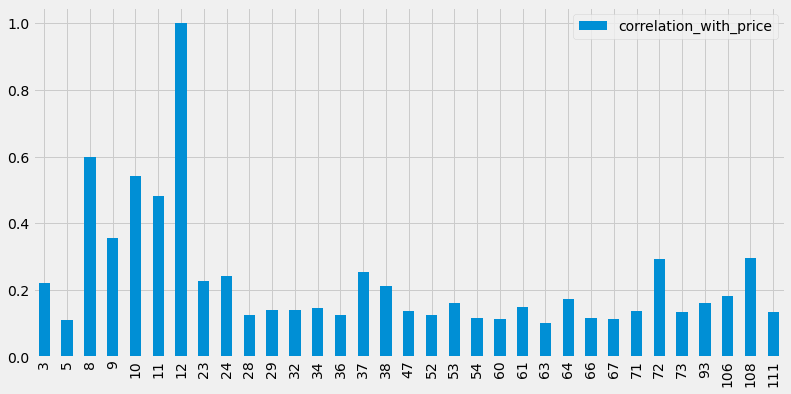

In [204]:
df1.plot( kind='bar', figsize=(12,6));

In [205]:
df1.sort_values(by=['correlation_with_price'], ascending=False)

features  correlation_with_price
12                                           price                1.000000
8                                     accommodates                0.599245
10                                        bedrooms                0.542839
11                                            beds                0.483499
9                                        bathrooms                0.356858
108                     property_type_Entire house                0.297117
72                                     amenity_TV_                0.292626
37                             amenity_Dishwasher_                0.254802
24     calculated_host_listings_count_entire_homes                0.242251
23                  calculated_host_listings_count                0.228065
3                        host_total_listings_count                0.220380
38                                  amenity_Dryer_                0.212213
106             neighbourhood_cleansed_Westminster                0.182562
64                       amenity_Private_entrance_                0.171776
53                                   amenity_Iron_                0.161493
93   neighbourhood_cleansed_Kensington and Chelsea                0.160962
61                                   amenity_Oven_                0.147779
34                           amenity_Coffee_maker_                0.144614
29                                amenity_Bathtub_                0.141071
32                               amenity_Cable_TV_                0.140637
71                                  amenity_Stove_                0.136294
47                             amenity_Hair_dryer_                0.135663
111                 property_type_Entire townhouse                0.133097
73                                 amenity_Washer_                0.133024
36                  amenity_Dishes_and_silverware_                0.126237
28                       amenity_Air_conditioning_                0.126067
52                       amenity_Indoor_fireplace_                0.124494
54                                amenity_Kitchen_                0.115458
66                           amenity_Refrigerator_                0.114645
67                                amenity_Shampoo_                0.114479
60                              amenity_Microwave_                0.114091
5                           host_identity_verified                0.109790
63                       amenity_Patio_or_balcony_                0.100368

In [206]:
df1_col = ['host_total_listings_count', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'amenity_Air_conditioning_', 'amenity_Bathtub_', 'amenity_Cable_TV_', 'amenity_Coffee_maker_', 'amenity_Dishes_and_silverware_', 'amenity_Dishwasher_', 'amenity_Dryer_', 'amenity_Hair_dryer_', 'amenity_Indoor_fireplace_', 'amenity_Iron_', 'amenity_Kitchen_', 'amenity_Microwave_', 'amenity_Oven_', 'amenity_Patio_or_balcony_', 'amenity_Private_entrance_', 'amenity_Refrigerator_', 'amenity_Shampoo_', 'amenity_Stove_', 'amenity_TV_', 'amenity_Washer_', 'neighbourhood_cleansed_Kensington and Chelsea', 'neighbourhood_cleansed_Westminster', 'property_type_Entire house', 'property_type_Entire townhouse']

len(df1_col)

33

# Spearman correlation with price

In [207]:
dfs = pd.DataFrame(listings.corr(method="spearman")["price"])
dfs.reset_index(inplace=True)
dfs.columns = ["features", "correlation_with_price"]
dfs.sort_values("correlation_with_price", ascending=False)
df2 = dfs[dfs["correlation_with_price"] > 0.1]
corr_features = df2["features"].values
corr_features.tolist().append("price")
print(df2.shape)
df2.sort_values(by=['correlation_with_price'], ascending=False)

(38, 2)


features  correlation_with_price
12                                           price                1.000000
8                                     accommodates                0.650061
24     calculated_host_listings_count_entire_homes                0.605641
10                                        bedrooms                0.556734
11                                            beds                0.517831
72                                     amenity_TV_                0.342270
9                                        bathrooms                0.311029
108                     property_type_Entire house                0.266364
37                             amenity_Dishwasher_                0.260979
38                                  amenity_Dryer_                0.216050
64                       amenity_Private_entrance_                0.200305
53                                   amenity_Iron_                0.183690
106             neighbourhood_cleansed_Westminster                0.182781
13                                  minimum_nights                0.175828
47                             amenity_Hair_dryer_                0.173225
93   neighbourhood_cleansed_Kensington and Chelsea                0.165405
61                                   amenity_Oven_                0.163670
71                                  amenity_Stove_                0.153597
3                        host_total_listings_count                0.151827
34                           amenity_Coffee_maker_                0.151073
32                               amenity_Cable_TV_                0.150430
29                                amenity_Bathtub_                0.149031
23                  calculated_host_listings_count                0.147763
67                                amenity_Shampoo_                0.147245
36                  amenity_Dishes_and_silverware_                0.145899
73                                 amenity_Washer_                0.141718
54                                amenity_Kitchen_                0.135061
66                           amenity_Refrigerator_                0.130552
35                         amenity_Cooking_basics_                0.129285
5                           host_identity_verified                0.123833
39                               amenity_Elevator_                0.120499
14                                  maximum_nights                0.117548
111                 property_type_Entire townhouse                0.115123
60                              amenity_Microwave_                0.112190
63                       amenity_Patio_or_balcony_                0.110632
28                       amenity_Air_conditioning_                0.108004
52                       amenity_Indoor_fireplace_                0.106578
30                             amenity_Bed_linens_                0.101191

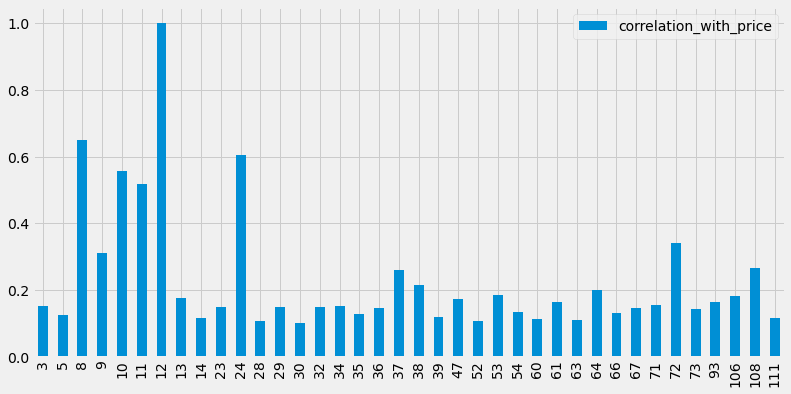

In [208]:
df2.plot( kind='bar', figsize=(12,6));

In [209]:
df2_col = ['amenity_Bed_linens_', 'maximum_nights', 'amenity_Elevator_', 'amenity_Cooking_basics_', 'minimum_nights','host_total_listings_count', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'amenity_Air_conditioning_', 'amenity_Bathtub_', 'amenity_Cable_TV_', 'amenity_Coffee_maker_', 'amenity_Dishes_and_silverware_', 'amenity_Dishwasher_', 'amenity_Dryer_', 'amenity_Hair_dryer_', 'amenity_Indoor_fireplace_', 'amenity_Iron_', 'amenity_Kitchen_', 'amenity_Microwave_', 'amenity_Oven_', 'amenity_Patio_or_balcony_', 'amenity_Private_entrance_', 'amenity_Refrigerator_', 'amenity_Shampoo_', 'amenity_Stove_', 'amenity_TV_', 'amenity_Washer_', 'neighbourhood_cleansed_Kensington and Chelsea', 'neighbourhood_cleansed_Westminster', 'property_type_Entire house', 'property_type_Entire townhouse']

len(df2_col)

38

In [76]:
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


ALPHAS = [0.00016, 0.00018, 0.00020, 0.00022, 0.00024, 0.00026, 0.00028, 0.00030, 0.00032]

X = listings.drop('price', axis=1)
y = listings['price']

#Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=42)


score_best = 0
for alpha in ALPHAS:
        print('alpha:', alpha)
        reg = Lasso(alpha=alpha, max_iter=1e5)
        reg.fit(X_train, y_train)
        score = reg.score(X_val, y_val)
        print('\t training score:', reg.score(X_train, y_train))
        print('\t validation score:', reg.score(X_val, y_val))
        if score > score_best:
            score_best = score
            alpha_best = alpha

print('best alpha:', alpha_best)
reg = Lasso(alpha=alpha_best, max_iter=1e5)
reg.fit(X_train, y_train)
print('training set:', reg.score(X_train, y_train))
y_pred_train = reg.predict(X_train)
y_pred_val = reg.predict(X_val)
print('validation set:', reg.score(X_val, y_val))
coefs = np.array(reg.coef_!=0)

print('total number of parameters:', sum(reg.coef_!=0))
plt.figure(1)
plt.scatter(y_pred_train, y_train)
plt.figure(2)
plt.scatter(y_pred_val, y_val)
plt.show()

alpha: 0.00016
	 training score: 0.5553374271485352
	 validation score: 0.5674403205464109
alpha: 0.00018
	 training score: 0.5553369395369924
	 validation score: 0.5674405516538001
alpha: 0.0002
	 training score: 0.5553363945593859
	 validation score: 0.5674407332077651
alpha: 0.00022
	 training score: 0.5553357922157155
	 validation score: 0.5674408652082477
alpha: 0.00024
	 training score: 0.5553351325059817
	 validation score: 0.5674409476553017
alpha: 0.00026
	 training score: 0.5553344169414695
	 validation score: 0.5674409765953332
alpha: 0.00028
	 training score: 0.5553337025634566
	 validation score: 0.5674408094592915
alpha: 0.0003
	 training score: 0.5553329352685555
	 validation score: 0.5674405940872558
alpha: 0.00032
	 training score: 0.5553321150567647
	 validation score: 0.5674403304790789
best alpha: 0.00026
training set: 0.5553344169414695
validation set: 0.5674409765953332


FileNotFoundError: [Errno 2] No such file or directory: '../Data/selected_coefs.npy'

training set: 0.5553344169414695
validation set: 0.5674409765953332
total number of parameters: 129


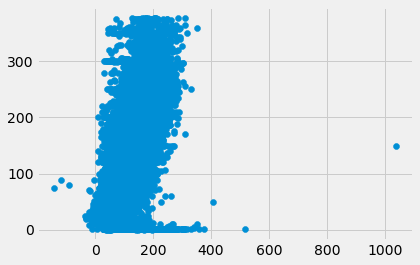

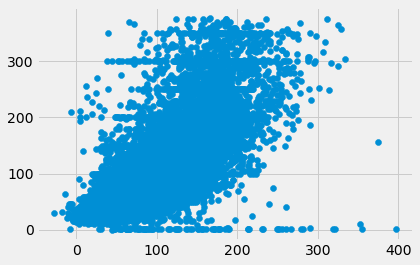

In [80]:
reg = Lasso(alpha=0.00026, max_iter=1e5)
reg.fit(X_train, y_train)
print('training set:', reg.score(X_train, y_train))
y_pred_train = reg.predict(X_train)
y_pred_val = reg.predict(X_val)
print('validation set:', reg.score(X_val, y_val))
coefs = np.array(reg.coef_!=0)

print('total number of parameters:', sum(reg.coef_!=0))
plt.figure(1)
plt.scatter(y_pred_train, y_train)
plt.figure(2)
plt.scatter(y_pred_val, y_val)
plt.show()

In [87]:
len(coefs)
coefs


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [93]:
col_set = set()
for i in range(len(coefs)):
        if (coefs[i]):
            col_set.add(X_train.columns[i])
X_train = X_train[list(col_set)]
X_val = X_val[list(col_set)]


IndexError: index 129 is out of bounds for axis 0 with size 129

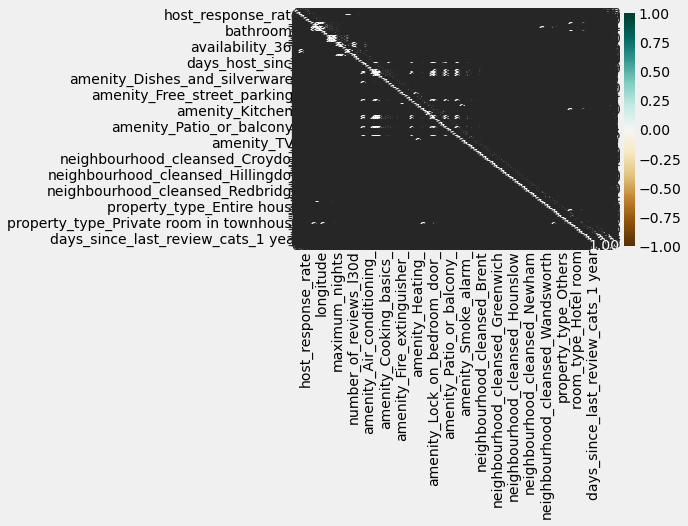

In [96]:
listings.corr() # Whole correlation matrix
listings.corr()['price'] # Check correlations with outcome only
sns.heatmap(listings.corr(), fmt=".2f", cmap='BrBG', annot=True, vmin=-1, vmax=1);


In [81]:
listings.head(3).T

0     1      2
host_response_rate                       100.0  83.0  100.0
host_acceptance_rate                     100.0  71.0  100.0
host_is_superhost                          0.0   0.0    0.0
host_total_listings_count                  3.0   3.0    1.0
host_has_profile_pic                       1.0   1.0    1.0
...                                        ...   ...    ...
days_since_last_review_cats_1 year         0.0   0.0    0.0
days_since_last_review_cats_2+ years       0.0   0.0    0.0
days_since_last_review_cats_2-6 months     1.0   1.0    1.0
days_since_last_review_cats_2-8 weeks      0.0   0.0    0.0
days_since_last_review_cats_6-12 months    0.0   0.0    0.0

[131 rows x 3 columns]

In [82]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

features = listings
# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

PCA(n_components=2)

In [83]:
# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.69436631e+13 7.16793555e+05]
[9.99999954e-01 4.23045192e-08]


The first component captures 99% of the variance. **What does this mean?**

The second component captures very little. That's a bit suspicous, because it suggests that all the many of the variables are covariant. Let's plot them and look at the loadings.

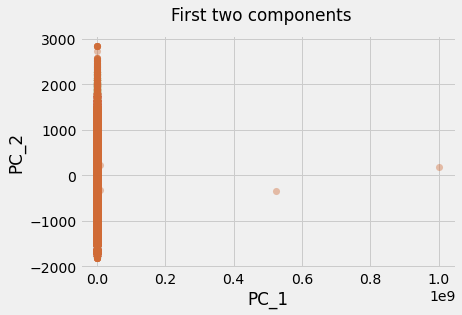

In [84]:
# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

In [108]:
listings.maximum_nights

0         190
1          29
2          50
3         365
4          21
         ... 
76979    1125
76980     365
76981      28
76982    1125
76983     365
Name: maximum_nights, Length: 75287, dtype: int64

In [85]:
loadings=pd.DataFrame(pca.components_,columns=listings.columns.values[:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

                                            0             1
maximum_nights                   1.000000e+00  9.582314e-07
days_host_since                  9.616692e-07  9.998704e-01
availability_365                 2.854046e-07  1.081255e-02
price                            7.834988e-08  1.548838e-03
number_of_reviews                6.095578e-08  6.846175e-03
...                                       ...           ...
neighbourhood_cleansed_Sutton    4.852249e-12  1.335729e-06
host_has_profile_pic             4.809633e-12  3.537847e-06
neighbourhood_cleansed_Bexley    4.374906e-12  2.295524e-06
neighbourhood_cleansed_Havering  4.082061e-12  1.651313e-06
amenity_Stove_                   3.902511e-12  7.804701e-06

[131 rows x 2 columns]


(array([7.5285e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 5.00000009e+07, 1.00000001e+08, 1.50000001e+08,
        2.00000001e+08, 2.50000000e+08, 3.00000000e+08, 3.50000000e+08,
        4.00000000e+08, 4.50000000e+08, 5.00000000e+08, 5.50000000e+08,
        6.00000000e+08, 6.50000000e+08, 7.00000000e+08, 7.50000000e+08,
        7.99999999e+08, 8.49999999e+08, 8.99999999e+08, 9.49999999e+08,
        9.99999999e+08]),
 <BarContainer object of 20 artists>)

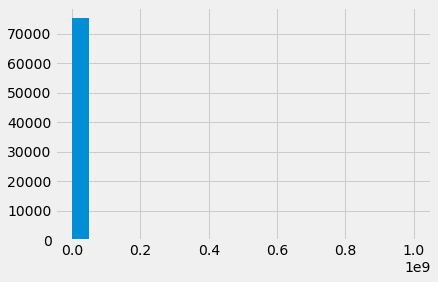

In [120]:
plt.hist(listings['maximum_nights'],bins=20)

(array([1.625e+03, 3.063e+03, 4.624e+03, 4.794e+03, 4.302e+03, 5.760e+03,
        5.836e+03, 7.818e+03, 9.709e+03, 6.784e+03, 6.519e+03, 4.418e+03,
        3.570e+03, 3.566e+03, 1.683e+03, 7.870e+02, 2.890e+02, 9.900e+01,
        3.300e+01, 8.000e+00]),
 array([-182. ,   50.8,  283.6,  516.4,  749.2,  982. , 1214.8, 1447.6,
        1680.4, 1913.2, 2146. , 2378.8, 2611.6, 2844.4, 3077.2, 3310. ,
        3542.8, 3775.6, 4008.4, 4241.2, 4474. ]),
 <BarContainer object of 20 artists>)

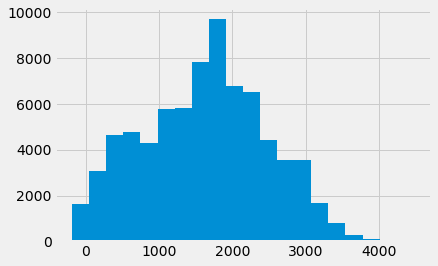

In [121]:
plt.hist(listings['days_host_since'],bins=20)

In [135]:
listings.columns.values

array(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'reviews_per_month', 'days_host_since',
       'amenity_Air_conditioning_', 'amenity_Bathtub_',
       'amenity_Bed_linens_', 'amenity_Breakfast_', 'amenity_Cable_TV_',
       'amenity_Carbon_monoxide_alarm_', 'amenity_Coffee_maker_',
       'amenity_Cooking_basics_', 'amenity_Dishes_and_silverware_',
       'amenity_Dishwasher_', 'amenity_Dryer_', 'amenity_

Dropped Maximum nights, days_host_since, host_total_listings_count, availability_365, calculated_host_listings_count, calculated_host_listings_count_entire_homes, price

In [86]:
listings.drop(['maximum_nights'], axis=1, inplace=True)

[716809.11288904  32059.43355132]
[0.92032056 0.04116152]
                                                  0         1
days_host_since                        9.998705e-01  0.006962
availability_365                       1.080564e-02  0.093480
number_of_reviews                      6.847416e-03  0.014236
availability_90                        5.425676e-03  0.025790
host_total_listings_count              3.827886e-03  0.664020
...                                             ...       ...
latitude                               1.127560e-06  0.000004
neighbourhood_cleansed_City of London  8.379918e-07  0.000002
neighbourhood_cleansed_Bromley         6.856557e-07  0.000008
days_since_last_review_cats_2-8 weeks  6.802347e-07  0.000007
neighbourhood_cleansed_Merton          1.893406e-07  0.000008

[130 rows x 2 columns]


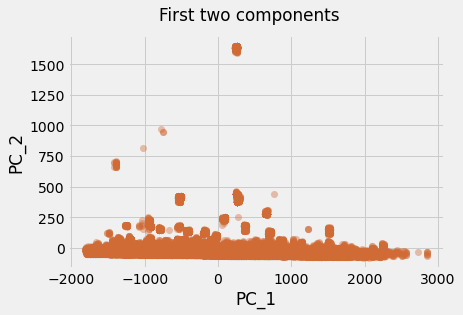

In [98]:
features = listings
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=listings.columns.values[:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

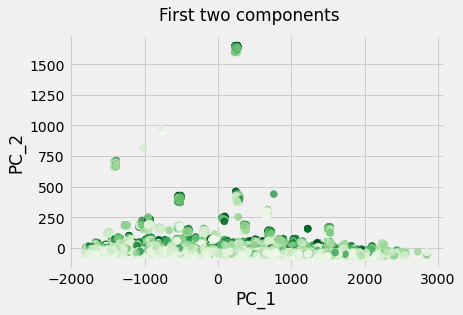

In [99]:
plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = listings['price'], cmap = plt.cm.Greens, s = 50, alpha = 0.8)

[32092.96722174 21625.22996734]
[0.51562337 0.34744291]
                                                        0         1
host_total_listings_count                    6.636656e-01  0.071026
calculated_host_listings_count               5.262215e-01  0.058816
calculated_host_listings_count_entire_homes  5.122956e-01  0.038481
availability_365                             9.838450e-02  0.957876
price                                        9.466516e-02  0.056644
...                                                   ...       ...
property_type_Entire serviced apartment      1.943755e-06  0.000054
neighbourhood_cleansed_City of London        1.646637e-06  0.000014
neighbourhood_cleansed_Brent                 1.161042e-06  0.000005
neighbourhood_cleansed_Hounslow              5.062035e-07  0.000013
property_type_Entire condominium             4.284289e-08  0.000022

[129 rows x 2 columns]


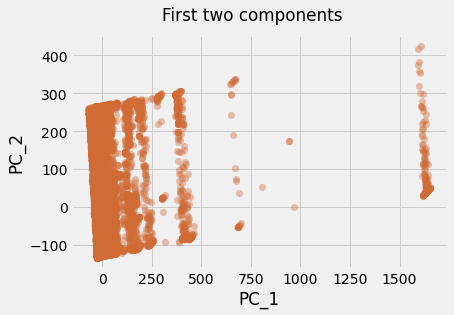

In [100]:
features = listings.drop('days_host_since',axis=1)
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=features.columns.values[:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

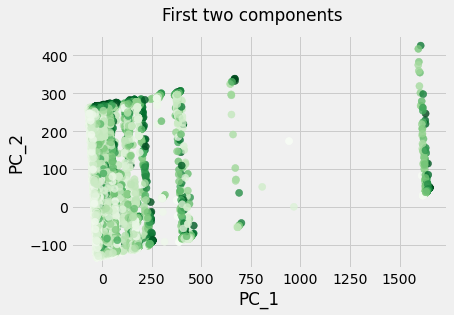

In [101]:
plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = listings['price'], cmap = plt.cm.Greens, s = 50, alpha = 0.8)

[21914.21460547 17754.34732334]
[0.45882447 0.37172808]
                                                        0         1
availability_365                             9.419814e-01  0.199526
availability_90                              2.128760e-01  0.037537
calculated_host_listings_count_entire_homes  1.554486e-01  0.671605
calculated_host_listings_count               1.409025e-01  0.693137
availability_60                              1.345289e-01  0.024676
...                                                   ...       ...
neighbourhood_cleansed_Waltham Forest        2.104480e-06  0.000025
neighbourhood_cleansed_Kingston upon Thames  9.896169e-07  0.000008
amenity_Private_living_room_                 9.658273e-07  0.000107
neighbourhood_cleansed_Richmond upon Thames  4.237164e-07  0.000011
property_type_Private room in condominium    2.645322e-07  0.000010

[128 rows x 2 columns]


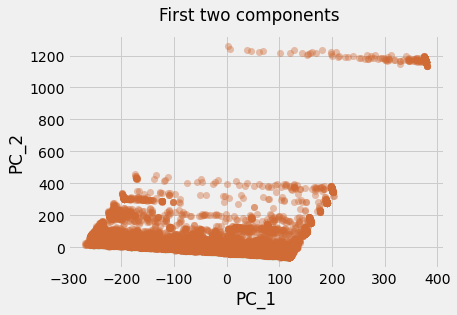

In [102]:
features = listings.drop(['host_total_listings_count', 'days_host_since'],axis=1)
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=features.columns.values[:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

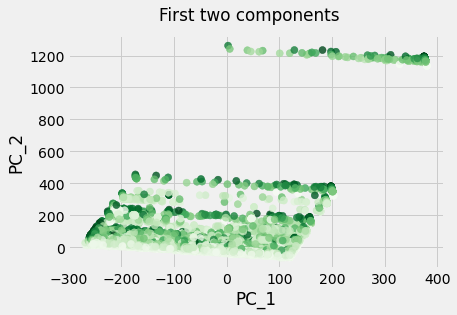

In [103]:
plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = listings['price'], cmap = plt.cm.Greens, s = 50, alpha = 0.8)

[17936.33854054  4114.78216765]
[0.65142445 0.14944353]
                                                        0         1
calculated_host_listings_count               7.069742e-01  0.116585
calculated_host_listings_count_entire_homes  6.898928e-01  0.093448
price                                        1.516049e-01  0.981671
availability_90                              1.914538e-02  0.081658
number_of_reviews                            1.695260e-02  0.048673
...                                                   ...       ...
neighbourhood_cleansed_Brent                 3.481198e-06  0.000077
property_type_Entire townhouse               2.663490e-06  0.000230
property_type_Entire loft                    2.058398e-06  0.000035
property_type_Room in boutique hotel         1.043837e-06  0.000003
neighbourhood_cleansed_Hounslow              1.597532e-08  0.000036

[127 rows x 2 columns]


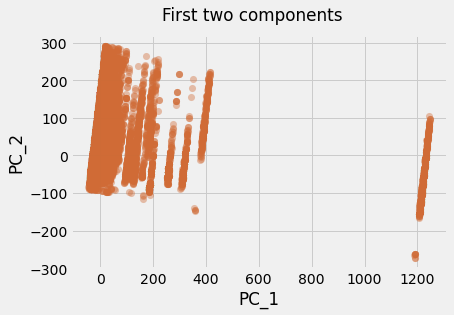

In [104]:
features = listings.drop(['host_total_listings_count', 'days_host_since', 'availability_365'],axis=1)
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=features.columns.values[:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

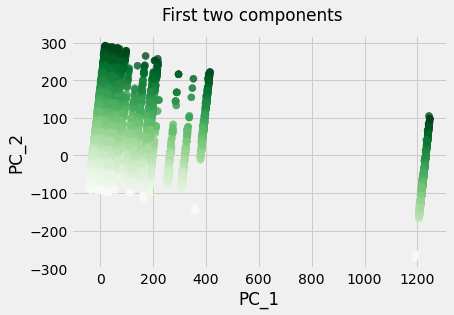

In [105]:
plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = listings['price'], cmap = plt.cm.Greens, s = 50, alpha = 0.8)

Removing **host_response_rate**

[10.49353025  5.35010437]
[0.08134412 0.04147313]
                                                    0         1
amenity_Refrigerator_                        0.258986  0.039882
amenity_Oven_                                0.253105  0.004320
amenity_Dishes_and_silverware_               0.251710  0.033942
amenity_Cooking_basics_                      0.244511  0.046656
amenity_Stove_                               0.243104  0.010551
...                                               ...       ...
neighbourhood_cleansed_Lambeth               0.000654  0.000525
room_type_Hotel room                         0.000600  0.002362
neighbourhood_cleansed_Havering              0.000399  0.012856
neighbourhood_cleansed_Kingston upon Thames  0.000249  0.007659
neighbourhood_cleansed_Brent                 0.000017  0.008648

[129 rows x 2 columns]


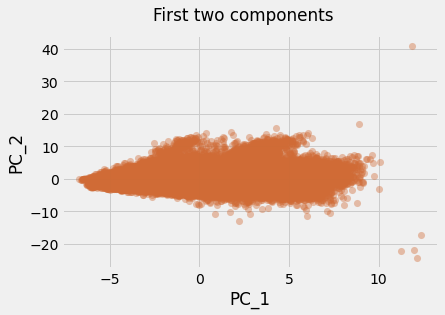

In [97]:
features = listings.iloc[:,1:]

features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=listings.columns.values[1:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

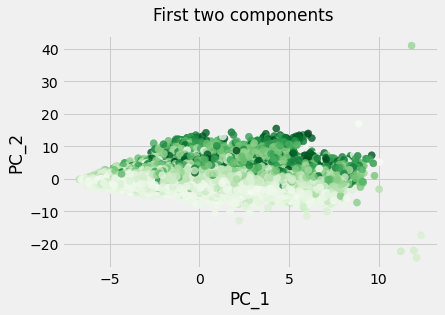

In [134]:
plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = listings['price'], cmap = plt.cm.Greens, s = 50, alpha = 0.8)

In [109]:
#Multidimensional scaling

ms = listings[df1_col].T
ms.shape

(33, 75287)

In [110]:
from sklearn.metrics import euclidean_distances

# compute the euclidean distances between the columns by passing the same data twice
# the resulting data matrix now has the pairwise distances between the boroughs
distMatrix = euclidean_distances(ms, ms)

distMatrix.shape

(33, 33)

In [111]:
from sklearn import manifold

#Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")

#project the data
Y = mds.fit_transform(distMatrix)

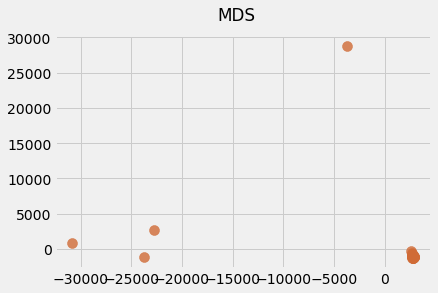

In [113]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.suptitle('MDS')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

#for i, txt in enumerate(ms["price"]):
   # ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))



In [114]:
ms = listings[df1_col].T
ms1 = ms.iloc[:-5,:]

distMatrix = euclidean_distances(ms1, ms1)

distMatrix.shape

(28, 28)

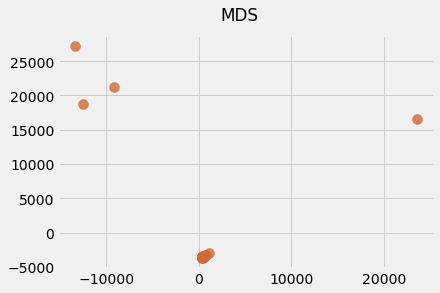

In [115]:
#Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")

#project the data
Y = mds.fit_transform(distMatrix)

fig, ax = plt.subplots()
plt.suptitle('MDS')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

(75287, 129)
75287


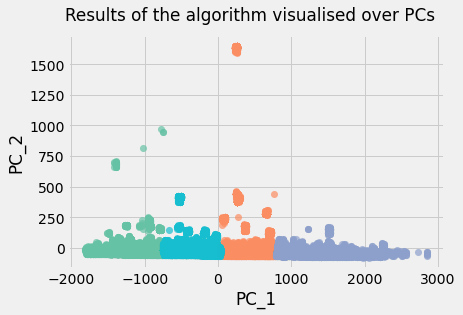

In [139]:
features = listings.iloc[:,1:]
knownLabels=listings.iloc[:,0]

print(features.shape)
print(len(knownLabels))

#computing K-Means with K = 3 (3 clusters)
kmeansModel = KMeans(init='random', n_clusters=4, n_init=10)
kmeansModel.fit_predict(features)
clusterLabels = kmeansModel.labels_

pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(features)

# have a look at the components directly if we can notice any interesting structure
projectedAxes = pca.transform(features)
projectedAxes=pd.DataFrame(projectedAxes) #put into a dataframe so easier to filter

plt.figure(1)
plt.suptitle('Results of the algorithm visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
#draw 3 scatterplots on top of each other, using a different colour for each
plt.scatter(projectedAxes[clusterLabels==0][0], projectedAxes[clusterLabels==0][1], c = "#66c2a5", s = 50, alpha = 0.7, linewidth=0) # greenish
plt.scatter(projectedAxes[clusterLabels==1][0], projectedAxes[clusterLabels==1][1], c = "#fc8d62", s = 50, alpha = 0.7, linewidth=0) # orangish
plt.scatter(projectedAxes[clusterLabels==2][0], projectedAxes[clusterLabels==2][1], c = "#8da0cb", s = 50, alpha = 0.7, linewidth=0) # blueish
plt.scatter(projectedAxes[clusterLabels==3][0], projectedAxes[clusterLabels==3][1], c = "#17becf", s = 50, alpha = 0.7, linewidth=0) # blueish
#plt.scatter(projectedAxes[clusterLabels==4][0], projectedAxes[clusterLabels==4][1], c = "#bcbd22", s = 50, alpha = 0.7, linewidth=0) # blueish
#plt.scatter(projectedAxes[clusterLabels==5][0], projectedAxes[clusterLabels==5][1], c = "#7f7f7f", s = 50, alpha = 0.7, linewidth=0) # blueish
#plt.scatter(projectedAxes[clusterLabels==6][0], projectedAxes[clusterLabels==6][1], c = "#e377c2", s = 50, alpha = 0.7, linewidth=0) # blueish
plt.show()


#'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'

Tried changing the cluster to 5 and 7. However, the end result was only

In [129]:
df = listings[df1_col]

features = df.iloc[:,1:]
knownLabels=df.iloc[:,0]

print(features.shape)
print(len(knownLabels))


(75287, 32)
75287


In [127]:
from sklearn.cluster import KMeans

#computing K-Means with K = 3 (3 clusters)
kmeansModel = KMeans(init='random', n_clusters=3, n_init=10)
kmeansModel.fit_predict(features)
clusterLabels = kmeansModel.labels_

In [123]:
for i, clustLabel in enumerate(clusterLabels):
    print("Cluster result: ", clustLabel, " Known labels: ",knownLabels[i])

Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  83.0
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  67.0
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  0.0
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  0.0
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  87.778831046402
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Known labels:  100.0
Cluster result:  0  Know

KeyError: 63

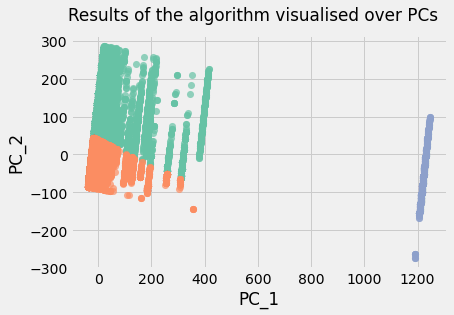

In [128]:
pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(features)

# have a look at the components directly if we can notice any interesting structure
projectedAxes = pca.transform(features)
projectedAxes=pd.DataFrame(projectedAxes) #put into a dataframe so easier to filter

plt.figure(1)
plt.suptitle('Results of the algorithm visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
#draw 3 scatterplots on top of each other, using a different colour for each
plt.scatter(projectedAxes[clusterLabels==0][0], projectedAxes[clusterLabels==0][1], c = "#66c2a5", s = 50, alpha = 0.7, linewidth=0) # greenish
plt.scatter(projectedAxes[clusterLabels==1][0], projectedAxes[clusterLabels==1][1], c = "#fc8d62", s = 50, alpha = 0.7, linewidth=0) # orangish
plt.scatter(projectedAxes[clusterLabels==2][0], projectedAxes[clusterLabels==2][1], c = "#8da0cb", s = 50, alpha = 0.7, linewidth=0) # blueish
plt.show()


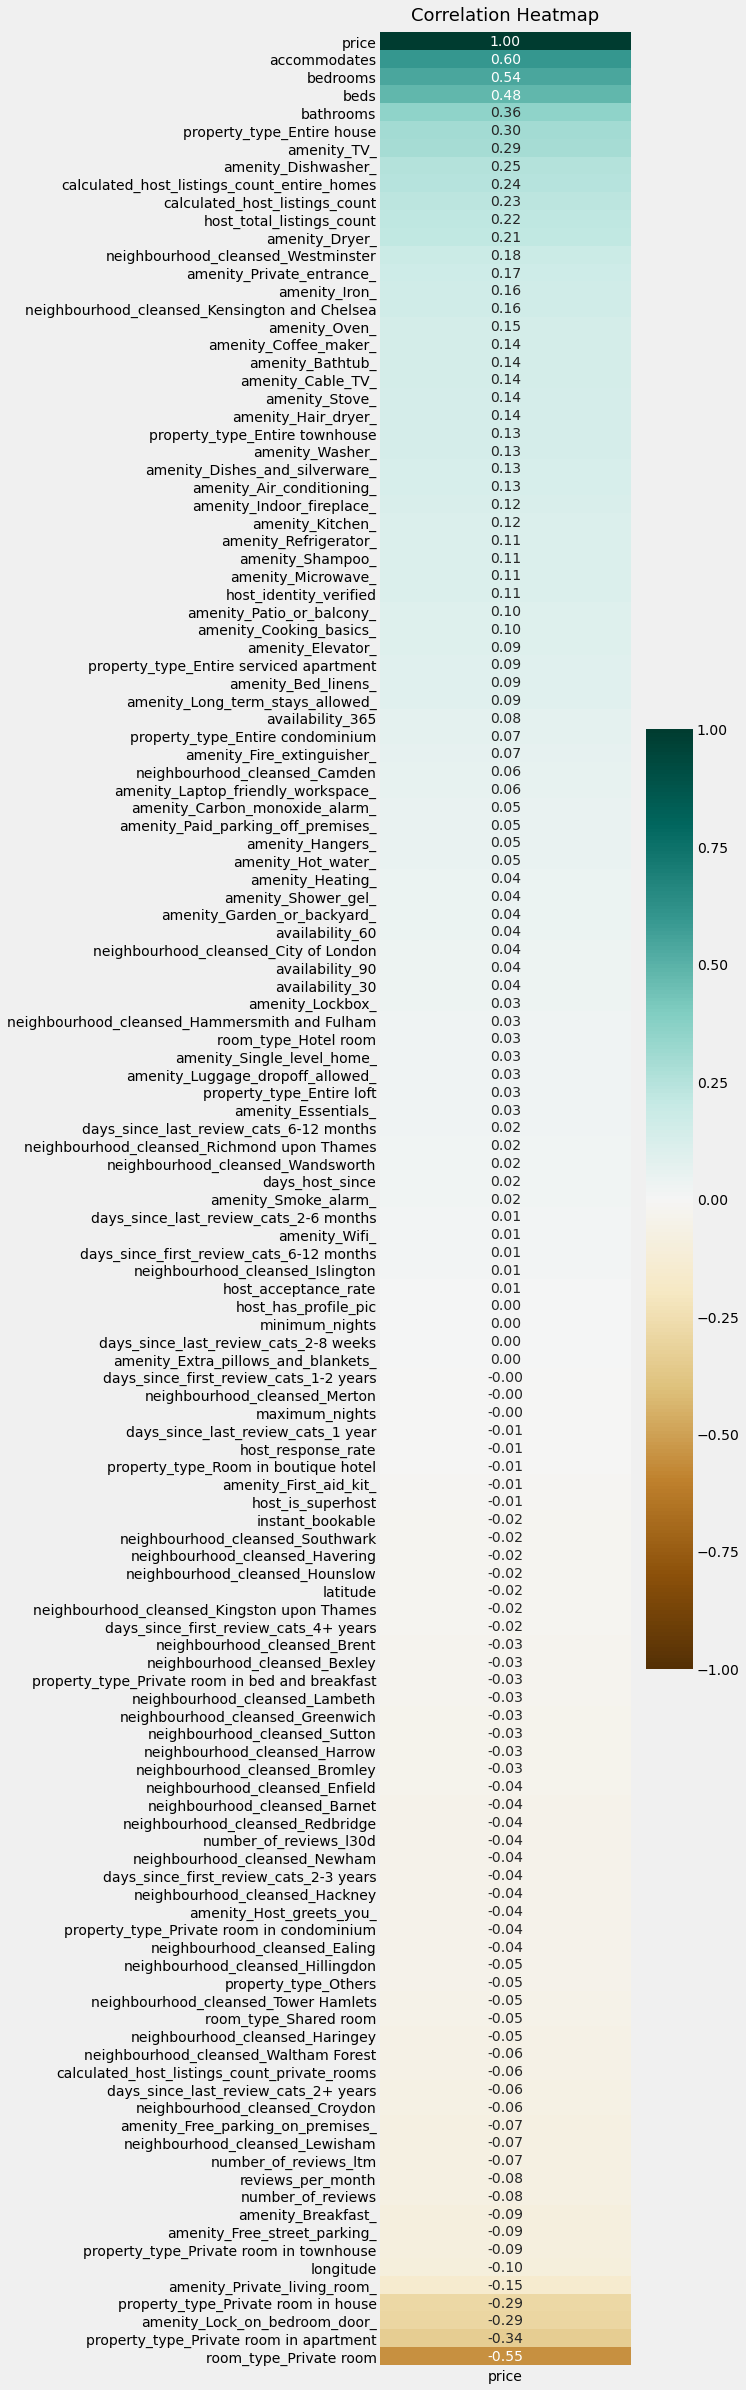

In [210]:
plt.figure(figsize=(5, 40))
feature_correlation = listings.corr()[['price']].sort_values(by='price', ascending=False)
# feature_correlation = feature_correlation[(feature_correlation > 0.1) & (feature_correlation != 1)]
# Show all features.
# heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')

# Show only price feature
heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

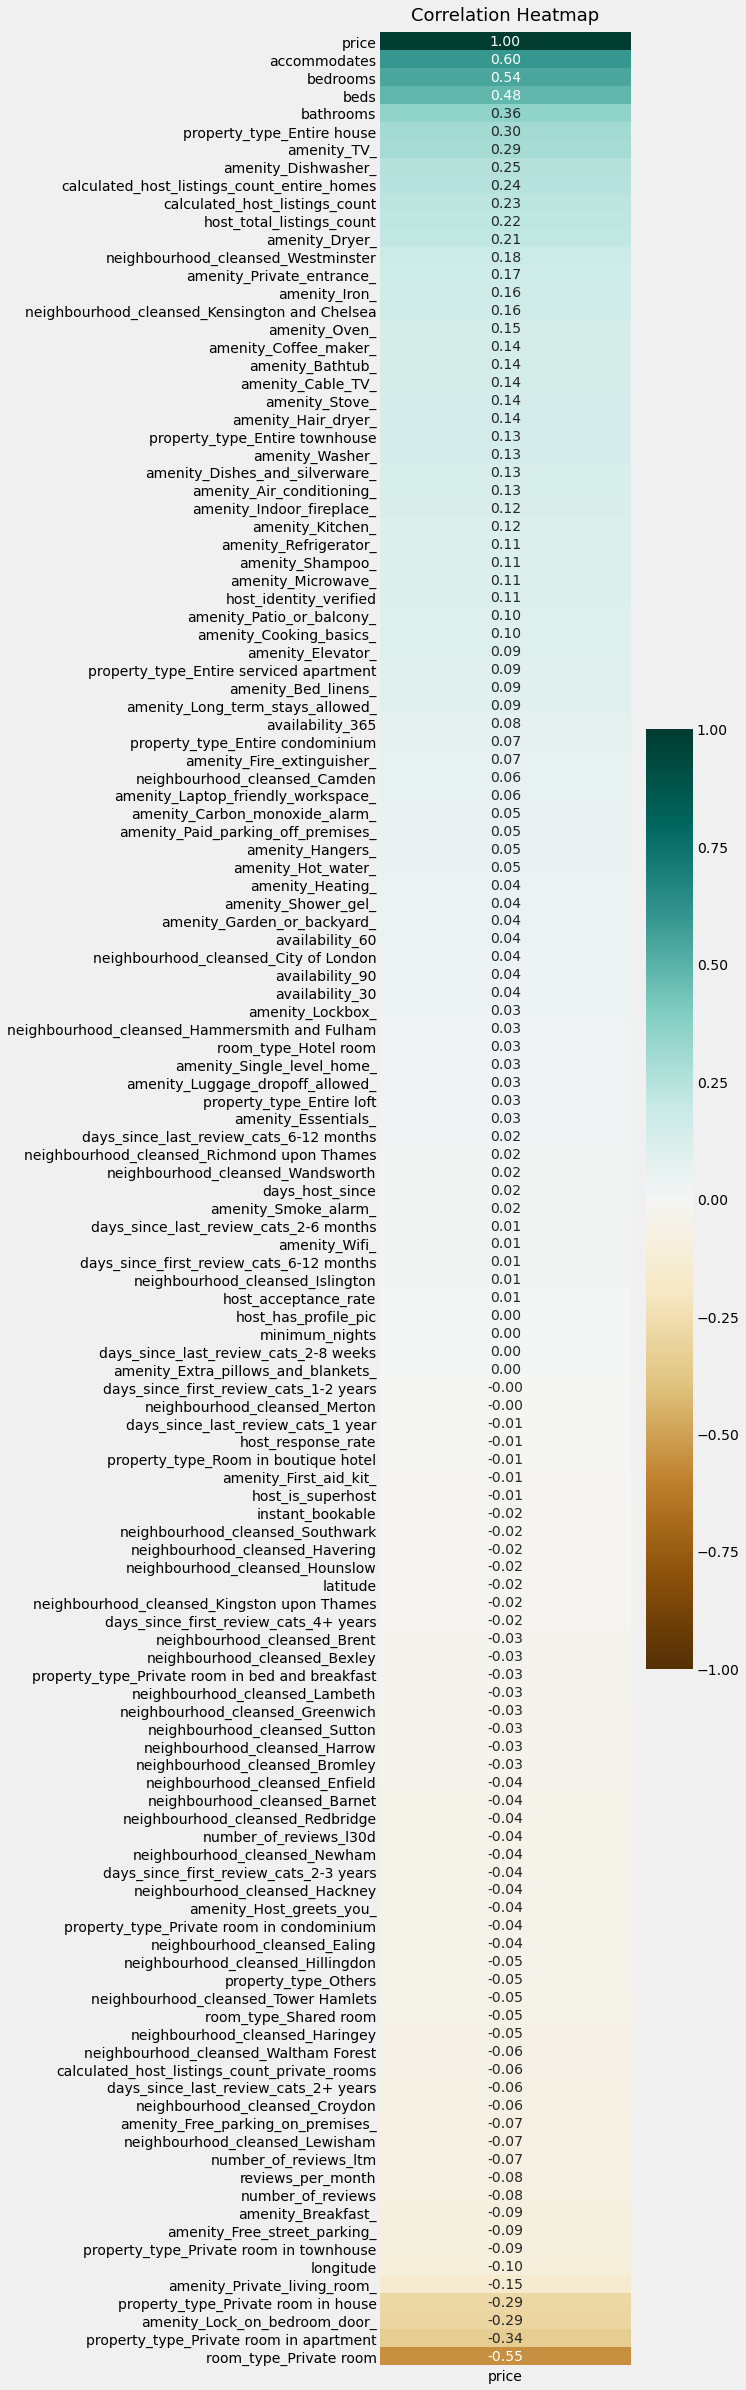

In [88]:
plt.figure(figsize=(5, 40))
feature_correlation = listings.corr()[['price']].sort_values(by='price', ascending=False)
# feature_correlation = feature_correlation[(feature_correlation > 0.1) & (feature_correlation != 1)]
# Show all features.
# heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')

# Show only price feature
heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# Correlation Analysis <a class="anchor" id="correlation-analysis"></a>

In [142]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75287 entries, 0 to 76983
Data columns (total 130 columns):
 #    Column                                           Dtype  
---   ------                                           -----  
 0    host_response_rate                               float64
 1    host_acceptance_rate                             float64
 2    host_is_superhost                                float64
 3    host_total_listings_count                        float64
 4    host_has_profile_pic                             float64
 5    host_identity_verified                           float64
 6    latitude                                         float64
 7    longitude                                        float64
 8    accommodates                                     int64  
 9    bathrooms                                        float64
 10   bedrooms                                         float64
 11   beds                                             float64
 12   pr

In [211]:
print(listings.shape)

(75287, 131)


Text(0.5, 1.0, 'Correlation Heatmap')

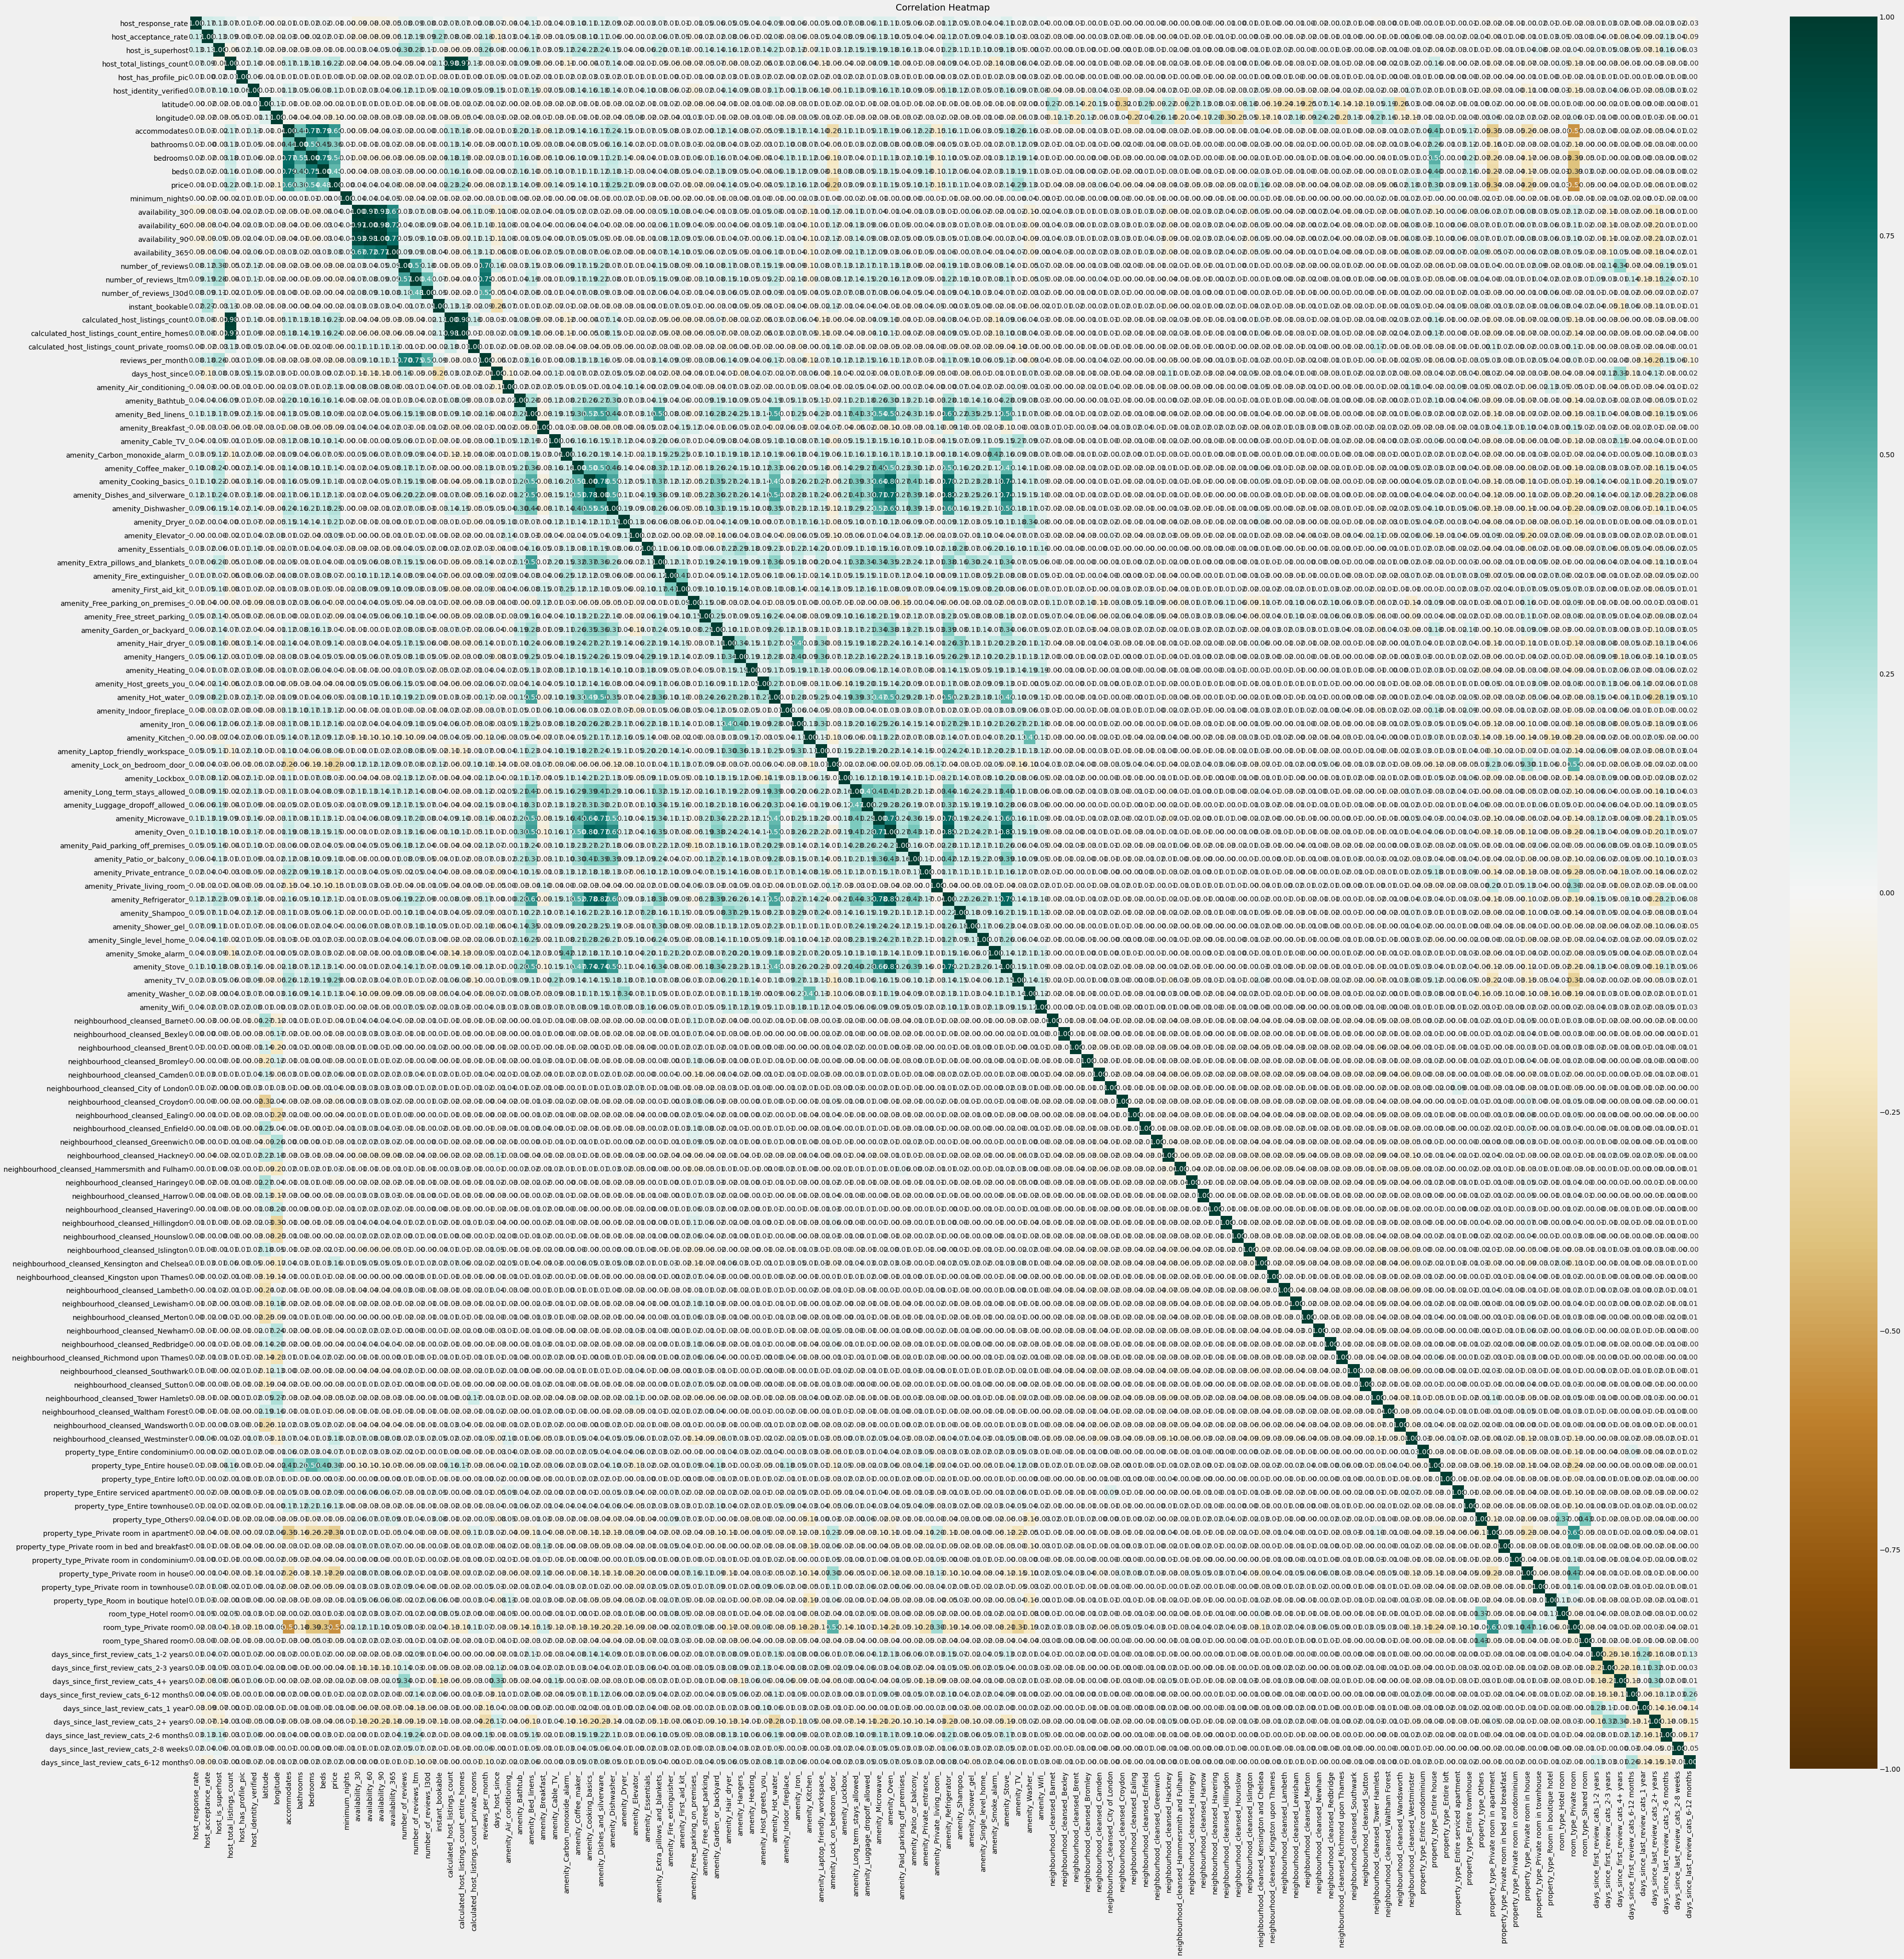

In [143]:
plt.figure(figsize=(60, 60))
feature_correlation = listings.corr()

# plt.figure(figsize=(5, 30))
# feature_correlation = listings.corr()[['price']].sort_values(by='price', ascending=False)

mask = (feature_correlation > 0.15) & (feature_correlation < 0.95) & (feature_correlation != 1)
# feature_correlation = feature_correlation[mask]

# Show all features.
# heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')

# Show only price feature
heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [252]:
feature_correlation_price = abs(feature_correlation['price'])
mask = (feature_correlation_price > 0.10) & (feature_correlation_price < 0.95) & (feature_correlation_price != 1)

# Columns to keep
columns_to_keep = list(feature_correlation_price[mask].index)

final_listings = listings[columns_to_keep]

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
final_listings_scaled_df.head()

# final_listings = final_listings.drop(['host_listings_count', 'host_total_listings_count'], axis=1)

# Visualize cleaned dataset
# final_listings_corr = final_listings_scaled_df.corr()

# For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]
# vif["features"] = final_listings_corr.columns
# vif = vif.round(1)

# pd.set_option('max_rows', None)
# display(vif.sort_values('VIF', ascending=False))

# plt.figure(figsize=(10, 30))
# heatmap = sns.heatmap(abs(feature_correlation[['price']]).sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# NOTE: Talk about a lot of multicolliniarity in the final dataset.
# We could try and resolve this to get better performance of the regression model but that is outside the scope of this coursework.
# Just know that this multicolliniarity could be having an effect.
# We could play around with this by removing features with high VIF although this is not ideal due to the resulting loss of relevent information.

# SKLearn - Grid search/Random search to test different hyperparameters

host_total_listings_count  host_identity_verified  accommodates  bathrooms  \
0                   0.002013                     1.0      0.200000   0.028571   
1                   0.002013                     1.0      0.066667   0.028571   
2                   0.000671                     1.0      0.066667   0.028571   
3                   0.012081                     1.0      0.333333   0.057143   
4                   0.002013                     1.0      0.066667   0.028571   

   bedrooms  beds  calculated_host_listings_count  \
0  0.000000  0.06                        0.001140   
1  0.000000  0.00                        0.001140   
2  0.000000  0.02                        0.000000   
3  0.040816  0.06                        0.015964   
4  0.000000  0.02                        0.001140   

   calculated_host_listings_count_entire_homes  amenity_Air_conditioning_  \
0                                     0.002281                        0.0   
1                                     0.001140                        0.0   
2                                     0.001140                        1.0   
3                                     0.017104                        0.0   
4                                     0.000000                        1.0   

   amenity_Bathtub_  amenity_Cable_TV_  amenity_Coffee_maker_  \
0               0.0                1.0                    1.0   
1               1.0                1.0                    1.0   
2               0.0                1.0                    1.0   
3               0.0                0.0                    1.0   
4               0.0                0.0                    0.0   

   amenity_Dishes_and_silverware_  amenity_Dishwasher_  amenity_Dryer_  \
0                             1.0                  0.0             0.0   
1                             1.0                  0.0             1.0   
2                             1.0                  0.0             1.0   
3                             1.0                  1.0             1.0   
4                             0.0                  0.0             0.0   

   amenity_Hair_dryer_  amenity_Indoor_fireplace_  amenity_Iron_  \
0                  1.0                        0.0            1.0   
1                  1.0                        0.0            1.0   
2                  1.0                        0.0            1.0   
3                  1.0                        0.0            1.0   
4                  1.0                        0.0            1.0   

   amenity_Kitchen_  amenity_Microwave_  amenity_Oven_  \
0               1.0                 1.0            1.0   
1               1.0                 0.0            1.0   
2               1.0                 1.0            0.0   
3               1.0                 1.0            1.0   
4               0.0                 0.0            0.0   

   amenity_Patio_or_balcony_  amenity_Private_entrance_  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   amenity_Refrigerator_  amenity_Shampoo_  amenity_Stove_  amenity_TV_  \
0                    1.0               0.0             1.0          1.0   
1                    1.0               1.0             1.0          1.0   
2                    1.0               1.0             0.0          1.0   
3                    1.0               1.0             1.0          1.0   
4                    0.0               1.0             0.0          1.0   

   amenity_Washer_  neighbourhood_cleansed_Kensington and Chelsea  \
0              1.0                                            0.0   
1              1.0                                            0.0   
2              1.0                                            1.0   
3              1.0                                        

In [253]:
feature_correlation_price = abs(feature_correlation['price'])
mask = (feature_correlation_price > 0.10) & (feature_correlation_price < 0.95) & (feature_correlation_price != 1)

# Columns to keep
columns_to_keep = list(feature_correlation_price[mask].index)

final_listings = listings[columns_to_keep]

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
final_listings_scaled_df.head()

# Visualize cleaned dataset
final_listings_corr = final_listings_scaled_df.corr()

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]
vif["features"] = final_listings_corr.columns
vif = vif.round(1)

pd.set_option('max_rows', None)
display(vif.sort_values('VIF', ascending=False))

VIF                                       features
6   9763.0                 calculated_host_listings_count
7   5758.6    calculated_host_listings_count_entire_homes
0   2641.5                      host_total_listings_count
23   208.7                          amenity_Refrigerator_
20   188.9                                  amenity_Oven_
25    83.2                                 amenity_Stove_
12    72.7                 amenity_Dishes_and_silverware_
2     55.2                                   accommodates
4     53.8                                       bedrooms
5     38.9                                           beds
19    38.5                             amenity_Microwave_
13    17.5                            amenity_Dishwasher_
11     7.5                          amenity_Coffee_maker_
17     5.6                                  amenity_Iron_
15     5.5                            amenity_Hair_dryer_
3      5.5                                      bathrooms
30     5.1                     property_type_Entire house
27     4.5                                amenity_Washer_
21     4.0                      amenity_Patio_or_balcony_
26     3.7                                    amenity_TV_
18     3.6                               amenity_Kitchen_
24     3.0                               amenity_Shampoo_
14     2.6                                 amenity_Dryer_
9      2.6                               amenity_Bathtub_
1      2.0                         host_identity_verified
22     2.0                      amenity_Private_entrance_
10     1.9                              amenity_Cable_TV_
31     1.6                 property_type_Entire townhouse
28     1.5  neighbourhood_cleansed_Kensington and Chelsea
16     1.4                      amenity_Indoor_fireplace_
29     1.3             neighbourhood_cleansed_Westminster
8      1.2                      amenity_Air_conditioning_

In [254]:
final_listings_scaled_df.shape

(75287, 32)

In [255]:
final_listings_scaled_df.head(5)

host_total_listings_count  host_identity_verified  accommodates  bathrooms  \
0                   0.002013                     1.0      0.200000   0.028571   
1                   0.002013                     1.0      0.066667   0.028571   
2                   0.000671                     1.0      0.066667   0.028571   
3                   0.012081                     1.0      0.333333   0.057143   
4                   0.002013                     1.0      0.066667   0.028571   

   bedrooms  beds  calculated_host_listings_count  \
0  0.000000  0.06                        0.001140   
1  0.000000  0.00                        0.001140   
2  0.000000  0.02                        0.000000   
3  0.040816  0.06                        0.015964   
4  0.000000  0.02                        0.001140   

   calculated_host_listings_count_entire_homes  amenity_Air_conditioning_  \
0                                     0.002281                        0.0   
1                                     0.001140                        0.0   
2                                     0.001140                        1.0   
3                                     0.017104                        0.0   
4                                     0.000000                        1.0   

   amenity_Bathtub_  amenity_Cable_TV_  amenity_Coffee_maker_  \
0               0.0                1.0                    1.0   
1               1.0                1.0                    1.0   
2               0.0                1.0                    1.0   
3               0.0                0.0                    1.0   
4               0.0                0.0                    0.0   

   amenity_Dishes_and_silverware_  amenity_Dishwasher_  amenity_Dryer_  \
0                             1.0                  0.0             0.0   
1                             1.0                  0.0             1.0   
2                             1.0                  0.0             1.0   
3                             1.0                  1.0             1.0   
4                             0.0                  0.0             0.0   

   amenity_Hair_dryer_  amenity_Indoor_fireplace_  amenity_Iron_  \
0                  1.0                        0.0            1.0   
1                  1.0                        0.0            1.0   
2                  1.0                        0.0            1.0   
3                  1.0                        0.0            1.0   
4                  1.0                        0.0            1.0   

   amenity_Kitchen_  amenity_Microwave_  amenity_Oven_  \
0               1.0                 1.0            1.0   
1               1.0                 0.0            1.0   
2               1.0                 1.0            0.0   
3               1.0                 1.0            1.0   
4               0.0                 0.0            0.0   

   amenity_Patio_or_balcony_  amenity_Private_entrance_  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   amenity_Refrigerator_  amenity_Shampoo_  amenity_Stove_  amenity_TV_  \
0                    1.0               0.0             1.0          1.0   
1                    1.0               1.0             1.0          1.0   
2                    1.0               1.0             0.0          1.0   
3                    1.0               1.0             1.0          1.0   
4                    0.0               1.0             0.0          1.0   

   amenity_Washer_  neighbourhood_cleansed_Kensington and Chelsea  \
0              1.0                                            0.0   
1              1.0                                            0.0   
2              1.0                                            1.0   
3              1.0                                        

In [268]:
from sklearn.linear_model import LinearRegression

#Split into explanatory and response variables
X = final_listings_scaled_df
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 1.0
        R2 for train data: 1.0
        
        RMSE for test data: 2.4207677746039463e-13
        RMSE for train data: 2.4347286429475424e-13
        
        Mean Absolute Error for test data: 1.8343660780981028e-13
        Mean Absolute Error for train data: 1.8449395626835851e-13
    


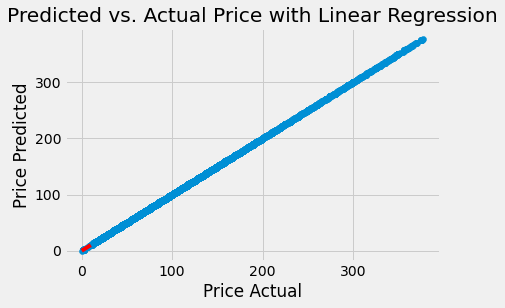

In [273]:
# Plot
plt.scatter(y_test, y_test_preds)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with Linear Regression')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

In [258]:
import xgboost
from xgboost import plot_importance

#Instantiate
xgb_model = xgboost.XGBRegressor()
#Fit
xgb_model.fit(X_train, y_train)
#Predict
training_preds_xgb_reg = xgb_model.predict(X_train)
test_preds_xgb_reg = xgb_model.predict(X_test)


print("""
        Training RMSE: {}
        Test RMSE: {}
        
        Training R2: {}
        Test R2: {}
        
        Training Mean Absolute Error: {}
        Test Mean Absolute Error: {}
    """.format(mean_squared_error(y_train, training_preds_xgb_reg) ** (1/2),
               mean_squared_error(y_test, test_preds_xgb_reg) ** (1/2),
               r2_score(y_train, training_preds_xgb_reg),
               r2_score(y_test, test_preds_xgb_reg),
               mean_absolute_error(y_train, training_preds_xgb_reg),
               mean_absolute_error(y_test, test_preds_xgb_reg)
              )
     )


        Training RMSE: 36.77688955540896
        Test RMSE: 42.38706558418736
        
        Training R2: 0.690578699308121
        Test R2: 0.5986571486324139
        
        Training Mean Absolute Error: 24.854618479009343
        Test Mean Absolute Error: 27.787023354928827
    


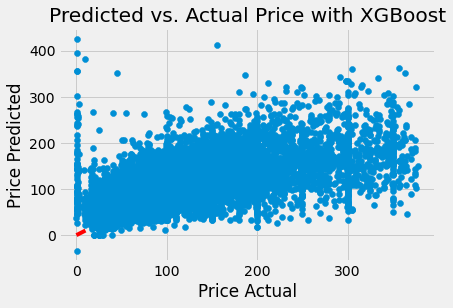

In [259]:
# Plot
plt.scatter(y_test, y_test_preds)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with XGBoost')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

In [221]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['feature'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('feature', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

feature      coefs  abs_coefs
37                         room_type_Private room -32.159614  32.159614
34            property_type_Private room in house  -6.372025   6.372025
36        property_type_Private room in apartment  -1.841312   1.841312
21                 property_type_Entire townhouse  13.560743  13.560743
4                      property_type_Entire house   3.948519   3.948519
11             neighbourhood_cleansed_Westminster  25.497890  25.497890
14  neighbourhood_cleansed_Kensington and Chelsea  25.732948  25.732948
32                                      longitude  -9.083334   9.083334
9                       host_total_listings_count -89.721408  89.721408
30                         host_identity_verified  -0.989499   0.989499

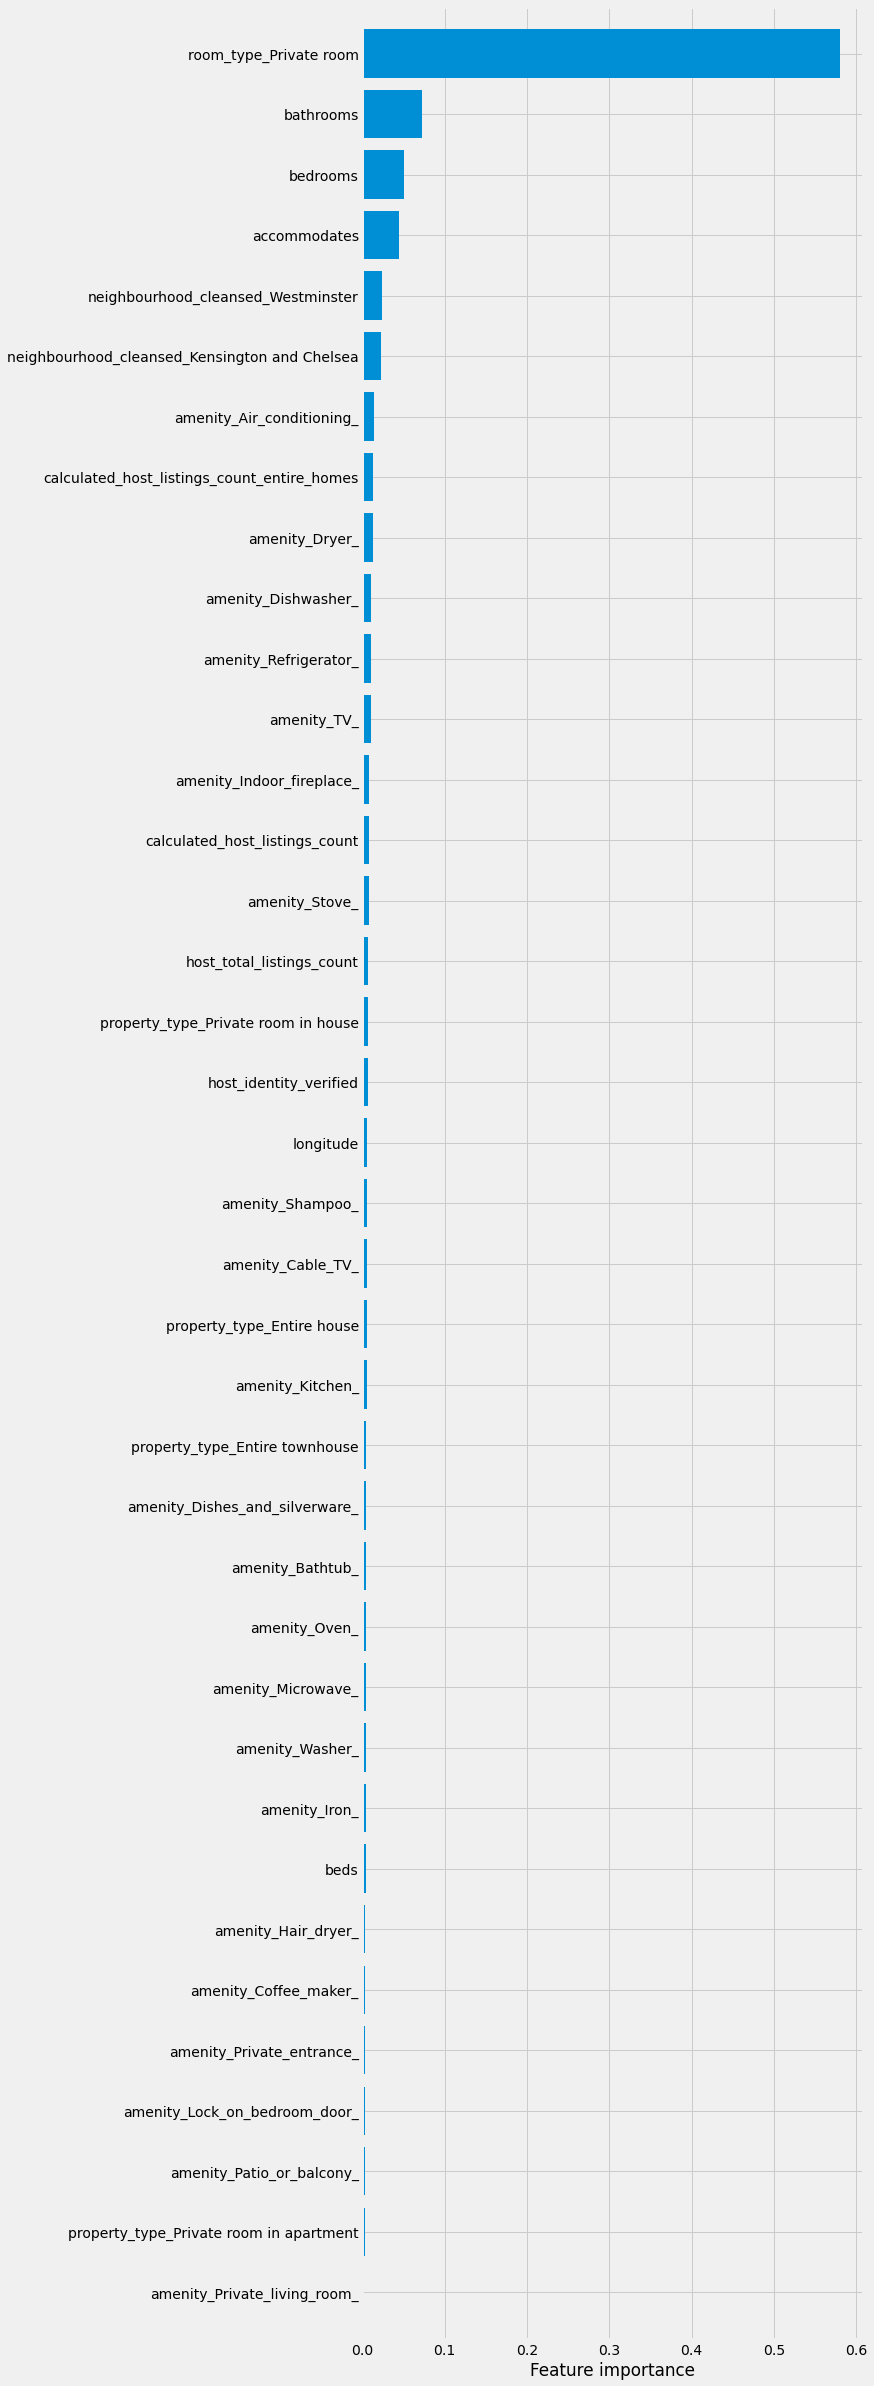

weight
room_type_Private room                         0.579703
bathrooms                                      0.072802
bedrooms                                       0.050201
accommodates                                   0.044428
neighbourhood_cleansed_Westminster             0.024337
neighbourhood_cleansed_Kensington and Chelsea  0.023234
amenity_Air_conditioning_                      0.014115
calculated_host_listings_count_entire_homes    0.013355
amenity_Dryer_                                 0.012595
amenity_Dishwasher_                            0.010987

In [222]:
ft_weights_xgb_reg = pd.DataFrame(xgb_model.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg = ft_weights_xgb_reg.sort_values('weight')

# Plotting feature importances
plt.figure(figsize=(8, 40))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
ft_weights_xgb_reg.sort_values(by='weight', ascending=False)[:10]

Going to drop the **calculated_host_listings_count_entire_homes** and **calculated_host_listings_count**.

We can see that there isn't much improvements to the results after removal of the above features.

In [223]:
df = listings.drop(['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes'], axis=1)

In [224]:
feature_correlation = df.corr()

feature_correlation_price = abs(feature_correlation['price'])
mask = (feature_correlation_price > 0.10) & (feature_correlation_price < 0.95) & (feature_correlation_price != 1)

# Columns to keep
columns_to_keep = list(feature_correlation_price[mask].index)

final_listings = df[columns_to_keep]

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
final_listings_scaled_df.head()

host_total_listings_count  host_identity_verified  longitude  accommodates  \
0                   0.002013                     1.0   0.483232      0.200000   
1                   0.002013                     1.0   0.491011      0.066667   
2                   0.000671                     1.0   0.417460      0.066667   
3                   0.012081                     1.0   0.453160      0.333333   
4                   0.002013                     1.0   0.381239      0.066667   

   bathrooms  bedrooms  beds  amenity_Air_conditioning_  amenity_Bathtub_  \
0   0.028571  0.000000  0.06                        0.0               0.0   
1   0.028571  0.000000  0.00                        0.0               1.0   
2   0.028571  0.000000  0.02                        1.0               0.0   
3   0.057143  0.040816  0.06                        0.0               0.0   
4   0.028571  0.000000  0.02                        1.0               0.0   

   amenity_Cable_TV_  amenity_Coffee_maker_  amenity_Dishes_and_silverware_  \
0                1.0                    1.0                             1.0   
1                1.0                    1.0                             1.0   
2                1.0                    1.0                             1.0   
3                0.0                    1.0                             1.0   
4                0.0                    0.0                             0.0   

   amenity_Dishwasher_  amenity_Dryer_  amenity_Hair_dryer_  \
0                  0.0             0.0                  1.0   
1                  0.0             1.0                  1.0   
2                  0.0             1.0                  1.0   
3                  1.0             1.0                  1.0   
4                  0.0             0.0                  1.0   

   amenity_Indoor_fireplace_  amenity_Iron_  amenity_Kitchen_  \
0                        0.0            1.0               1.0   
1                        0.0            1.0               1.0   
2                        0.0            1.0               1.0   
3                        0.0            1.0               1.0   
4                        0.0            1.0               0.0   

   amenity_Lock_on_bedroom_door_  amenity_Microwave_  amenity_Oven_  \
0                            0.0                 1.0            1.0   
1                            1.0                 0.0            1.0   
2                            0.0                 1.0            0.0   
3                            0.0                 1.0            1.0   
4                            1.0                 0.0            0.0   

   amenity_Patio_or_balcony_  amenity_Private_entrance_  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   amenity_Private_living_room_  amenity_Refrigerator_  amenity_Shampoo_  \
0                           0.0                    1.0               0.0   
1                           0.0                    1.0               1.0   
2                           0.0                    1.0               1.0   
3                           0.0                    1.0               1.0   
4                           0.0                    0.0               1.0   

   amenity_Stove_  amenity_TV_  amenity_Washer_  \
0             1.0          1.0              1.0   
1             1.0          1.0              1.0   
2             0.0          1.0              1.0   
3             1.0          1.0              1.0   
4             0.0          1.0              0.0   

   neighbourhood_cleansed_Kensington and Chelsea  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4 

In [225]:
final_listings_scaled_df.shape

(75287, 36)

In [226]:
# Visualize cleaned dataset
final_listings_corr = final_listings_scaled_df.corr()

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]
vif["features"] = final_listings_corr.columns
vif = vif.round(1)

pd.set_option('max_rows', None)
display(vif.sort_values('VIF', ascending=False))

VIF                                       features
35  216.0                         room_type_Private room
24  209.1                          amenity_Refrigerator_
20  189.5                                  amenity_Oven_
26   82.9                                 amenity_Stove_
33   82.4        property_type_Private room in apartment
3    76.9                                   accommodates
11   72.4                 amenity_Dishes_and_silverware_
5    56.6                                       bedrooms
34   46.4            property_type_Private room in house
6    42.1                                           beds
19   39.2                             amenity_Microwave_
12   17.5                            amenity_Dishwasher_
10    7.5                          amenity_Coffee_maker_
4     5.7                                      bathrooms
14    5.6                            amenity_Hair_dryer_
16    5.5                                  amenity_Iron_
31    5.1                     property_type_Entire house
18    4.9                  amenity_Lock_on_bedroom_door_
28    4.7                                amenity_Washer_
17    4.6                               amenity_Kitchen_
21    4.1                      amenity_Patio_or_balcony_
27    3.5                                    amenity_TV_
25    2.7                               amenity_Shampoo_
8     2.6                               amenity_Bathtub_
13    2.6                                 amenity_Dryer_
22    2.2                      amenity_Private_entrance_
9     1.9                              amenity_Cable_TV_
23    1.8                   amenity_Private_living_room_
1     1.7                         host_identity_verified
0     1.7                      host_total_listings_count
32    1.6                 property_type_Entire townhouse
29    1.5  neighbourhood_cleansed_Kensington and Chelsea
30    1.5             neighbourhood_cleansed_Westminster
15    1.4                      amenity_Indoor_fireplace_
2     1.3                                      longitude
7     1.2                      amenity_Air_conditioning_

In [227]:
#Linear Regression

#Split into explanatory and response variables
X = final_listings_scaled_df
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.5304740686770717
        R2 for train data: 0.5142295726973238
        
        RMSE for test data: 45.8464145783798
        RMSE for train data: 46.080313809686785
        
        Mean Absolute Error for test data: 30.63869276768752
        Mean Absolute Error for train data: 30.72052745530571
    


In [228]:
#Instantiate
xgb_model = xgboost.XGBRegressor()
#Fit
xgb_model.fit(X_train, y_train)
#Predict
training_preds_xgb_reg = xgb_model.predict(X_train)
test_preds_xgb_reg = xgb_model.predict(X_test)


print("""
        Training RMSE: {}
        Test RMSE: {}
        
        Training R2: {}
        Test R2: {}
        
        Training Mean Absolute Error: {}
        Test Mean Absolute Error: {}
    """.format(mean_squared_error(y_train, training_preds_xgb_reg) ** (1/2),
               mean_squared_error(y_test, test_preds_xgb_reg) ** (1/2),
               r2_score(y_train, training_preds_xgb_reg),
               r2_score(y_test, test_preds_xgb_reg),
               mean_absolute_error(y_train, training_preds_xgb_reg),
               mean_absolute_error(y_test, test_preds_xgb_reg)
              )
     )


        Training RMSE: 36.56174694973819
        Test RMSE: 42.20079519748009
        
        Training R2: 0.694188302582678
        Test R2: 0.6021768084188716
        
        Training Mean Absolute Error: 24.643447713785765
        Test Mean Absolute Error: 27.712735901364674
    


Going to repeat the test with df1 and df2 features... the features selected from the pearson and spearman analysis.

The results using the features selected from the above two analysis did not produce a better results compared to before.

In [260]:
#pearson list
df =  listings[df1_col] 

feature_correlation = df.corr()

feature_correlation_price = abs(feature_correlation['price'])
mask = (feature_correlation_price > 0.10) & (feature_correlation_price < 0.95) & (feature_correlation_price != 1)

# Columns to keep
columns_to_keep = list(feature_correlation_price[mask].index)
print(columns_to_keep)

final_listings = df[columns_to_keep]
print(final_listings.head(1).T)

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
print(final_listings_scaled_df.head(1))

# Visualize cleaned dataset
final_listings_corr = final_listings_scaled_df.corr()

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]
vif["features"] = final_listings_corr.columns
vif = vif.round(1)

pd.set_option('max_rows', None)
display(vif.sort_values('VIF', ascending=False))

['host_total_listings_count', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'amenity_Air_conditioning_', 'amenity_Bathtub_', 'amenity_Cable_TV_', 'amenity_Coffee_maker_', 'amenity_Dishes_and_silverware_', 'amenity_Dishwasher_', 'amenity_Dryer_', 'amenity_Hair_dryer_', 'amenity_Indoor_fireplace_', 'amenity_Iron_', 'amenity_Kitchen_', 'amenity_Microwave_', 'amenity_Oven_', 'amenity_Patio_or_balcony_', 'amenity_Private_entrance_', 'amenity_Refrigerator_', 'amenity_Shampoo_', 'amenity_Stove_', 'amenity_TV_', 'amenity_Washer_', 'neighbourhood_cleansed_Kensington and Chelsea', 'neighbourhood_cleansed_Westminster', 'property_type_Entire house', 'property_type_Entire townhouse']
                                                 0
host_total_listings_count                      3.0
host_identity_verified                         1.0
accommodates                                   4.0
bathro

VIF                                       features
6   9763.0                 calculated_host_listings_count
7   5758.6    calculated_host_listings_count_entire_homes
0   2641.5                      host_total_listings_count
23   208.7                          amenity_Refrigerator_
20   188.9                                  amenity_Oven_
25    83.2                                 amenity_Stove_
12    72.7                 amenity_Dishes_and_silverware_
2     55.2                                   accommodates
4     53.8                                       bedrooms
5     38.9                                           beds
19    38.5                             amenity_Microwave_
13    17.5                            amenity_Dishwasher_
11     7.5                          amenity_Coffee_maker_
17     5.6                                  amenity_Iron_
15     5.5                            amenity_Hair_dryer_
3      5.5                                      bathrooms
30     5.1                     property_type_Entire house
27     4.5                                amenity_Washer_
21     4.0                      amenity_Patio_or_balcony_
26     3.7                                    amenity_TV_
18     3.6                               amenity_Kitchen_
24     3.0                               amenity_Shampoo_
14     2.6                                 amenity_Dryer_
9      2.6                               amenity_Bathtub_
1      2.0                         host_identity_verified
22     2.0                      amenity_Private_entrance_
10     1.9                              amenity_Cable_TV_
31     1.6                 property_type_Entire townhouse
28     1.5  neighbourhood_cleansed_Kensington and Chelsea
16     1.4                      amenity_Indoor_fireplace_
29     1.3             neighbourhood_cleansed_Westminster
8      1.2                      amenity_Air_conditioning_

In [230]:
final_listings_scaled_df.shape

(75287, 32)

In [261]:
#Linear Regression

#Split into explanatory and response variables
X = final_listings_scaled_df
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.4898677278290703
        R2 for train data: 0.4710440624251352
        
        RMSE for test data: 47.78779427002376
        RMSE for train data: 48.08500218063939
        
        Mean Absolute Error for test data: 32.88915738488586
        Mean Absolute Error for train data: 33.053714057537896
    


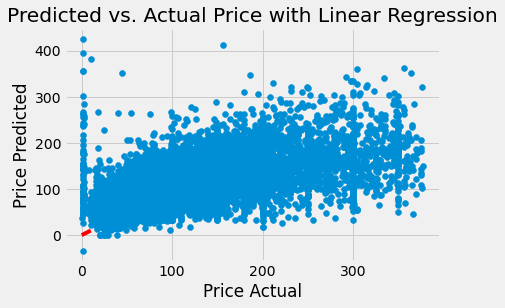

In [262]:
# Plot
plt.scatter(y_test, y_test_preds)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with Linear Regression')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

In [263]:
#Instantiate
xgb_model = xgboost.XGBRegressor()
#Fit
xgb_model.fit(X_train, y_train)
#Predict
training_preds_xgb_reg = xgb_model.predict(X_train)
test_preds_xgb_reg = xgb_model.predict(X_test)


print("""
        Training RMSE: {}
        Test RMSE: {}
        
        Training R2: {}
        Test R2: {}
        
        Training Mean Absolute Error: {}
        Test Mean Absolute Error: {}
    """.format(mean_squared_error(y_train, training_preds_xgb_reg) ** (1/2),
               mean_squared_error(y_test, test_preds_xgb_reg) ** (1/2),
               r2_score(y_train, training_preds_xgb_reg),
               r2_score(y_test, test_preds_xgb_reg),
               mean_absolute_error(y_train, training_preds_xgb_reg),
               mean_absolute_error(y_test, test_preds_xgb_reg)
              )
     )


        Training RMSE: 36.77688955540896
        Test RMSE: 42.38706558418736
        
        Training R2: 0.690578699308121
        Test R2: 0.5986571486324139
        
        Training Mean Absolute Error: 24.854618479009343
        Test Mean Absolute Error: 27.787023354928827
    


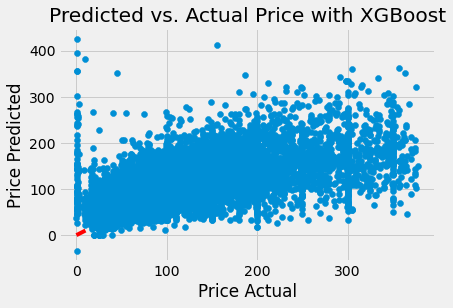

In [264]:
# Plot
plt.scatter(y_test, y_test_preds)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with XGBoost')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

In [265]:
final_listings =  listings[df2_col] 

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
print(final_listings_scaled_df.head(1))
print(final_listings_scaled_df.shape)

   amenity_Bed_linens_  maximum_nights  amenity_Elevator_  \
0                  0.0    1.890000e-07                0.0   

   amenity_Cooking_basics_  minimum_nights  host_total_listings_count  \
0                      1.0        0.005338                   0.002013   

   host_identity_verified  accommodates  bathrooms  bedrooms  beds     price  \
0                     1.0           0.2   0.028571       0.0  0.06  0.256614   

   calculated_host_listings_count  \
0                         0.00114   

   calculated_host_listings_count_entire_homes  amenity_Air_conditioning_  \
0                                     0.002281                        0.0   

   amenity_Bathtub_  amenity_Cable_TV_  amenity_Coffee_maker_  \
0               0.0                1.0                    1.0   

   amenity_Dishes_and_silverware_  amenity_Dishwasher_  amenity_Dryer_  \
0                             1.0                  0.0             0.0   

   amenity_Hair_dryer_  amenity_Indoor_fireplace_  amenity_

In [266]:
#Linear Regression

#Split into explanatory and response variables
X = final_listings_scaled_df
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 1.0
        R2 for train data: 1.0
        
        RMSE for test data: 2.4207677746039463e-13
        RMSE for train data: 2.4347286429475424e-13
        
        Mean Absolute Error for test data: 1.8343660780981028e-13
        Mean Absolute Error for train data: 1.8449395626835851e-13
    


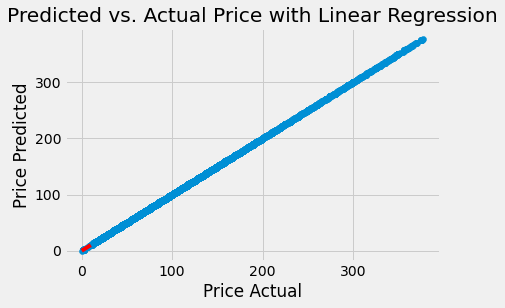

In [267]:
# Plot
plt.scatter(y_test, y_test_preds)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with Linear Regression')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

In [240]:
#spearmen list
final_listings =  listings[df2_col] 

'''
feature_correlation = df.corr()

feature_correlation_price = abs(feature_correlation['price'])
mask = (feature_correlation_price > 0.10) & (feature_correlation_price < 0.95) & (feature_correlation_price != 1)

# Columns to keep
columns_to_keep = list(feature_correlation_price[mask].index)
'''

#final_listings = df #[columns_to_keep]
#print(final_listings.head(1))

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
print(final_listings_scaled_df.head(1))
print(final_listings_scaled_df.shape)
'''
# Visualize cleaned dataset
final_listings_corr = final_listings_scaled_df.corr()

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]
vif["features"] = final_listings_corr.columns
vif = vif.round(1)

pd.set_option('max_rows', None)
display(vif.sort_values('VIF', ascending=False))
'''

   amenity_Bed_linens_  maximum_nights  amenity_Elevator_  \
0                  0.0    1.890000e-07                0.0   

   amenity_Cooking_basics_  minimum_nights  host_total_listings_count  \
0                      1.0        0.005338                   0.002013   

   host_identity_verified  accommodates  bathrooms  bedrooms  beds     price  \
0                     1.0           0.2   0.028571       0.0  0.06  0.256614   

   calculated_host_listings_count  \
0                         0.00114   

   calculated_host_listings_count_entire_homes  amenity_Air_conditioning_  \
0                                     0.002281                        0.0   

   amenity_Bathtub_  amenity_Cable_TV_  amenity_Coffee_maker_  \
0               0.0                1.0                    1.0   

   amenity_Dishes_and_silverware_  amenity_Dishwasher_  amenity_Dryer_  \
0                             1.0                  0.0             0.0   

   amenity_Hair_dryer_  amenity_Indoor_fireplace_  amenity_

'\n# Visualize cleaned dataset\nfinal_listings_corr = final_listings_scaled_df.corr()\n\n# For each X, calculate VIF and save in dataframe\nvif = pd.DataFrame()\nvif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]\nvif["features"] = final_listings_corr.columns\nvif = vif.round(1)\n\npd.set_option(\'max_rows\', None)\ndisplay(vif.sort_values(\'VIF\', ascending=False))\n'

In [244]:
#Linear Regression

#Split into explanatory and response variables
X = final_listings_scaled_df
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 1.0
        R2 for train data: 1.0
        
        RMSE for test data: 2.4207677746039463e-13
        RMSE for train data: 2.4347286429475424e-13
        
        Mean Absolute Error for test data: 1.8343660780981028e-13
        Mean Absolute Error for train data: 1.8449395626835851e-13
    


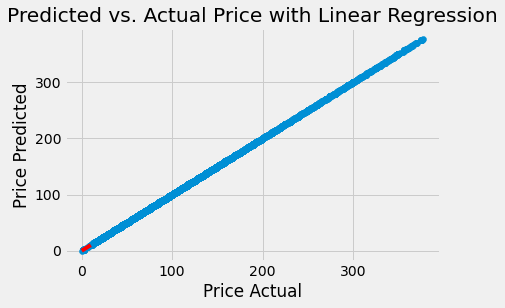

In [247]:
# Plot
plt.scatter(y_test, y_test_preds)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with Linear Regression')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

In [248]:
#Instantiate
xgb_model = xgboost.XGBRegressor()
#Fit
xgb_model.fit(X_train, y_train)
#Predict
training_preds_xgb_reg = xgb_model.predict(X_train)
test_preds_xgb_reg = xgb_model.predict(X_test)


print("""
        Training RMSE: {}
        Test RMSE: {}
        
        Training R2: {}
        Test R2: {}
        
        Training Mean Absolute Error: {}
        Test Mean Absolute Error: {}
    """.format(mean_squared_error(y_train, training_preds_xgb_reg) ** (1/2),
               mean_squared_error(y_test, test_preds_xgb_reg) ** (1/2),
               r2_score(y_train, training_preds_xgb_reg),
               r2_score(y_test, test_preds_xgb_reg),
               mean_absolute_error(y_train, training_preds_xgb_reg),
               mean_absolute_error(y_test, test_preds_xgb_reg)
              )
     )


        Training RMSE: 0.041434167886018614
        Test RMSE: 0.06052875081986429
        
        Training R2: 0.9999996072488556
        Test R2: 0.9999991815875066
        
        Training Mean Absolute Error: 0.018828336186636332
        Test Mean Absolute Error: 0.021805264722543835
    


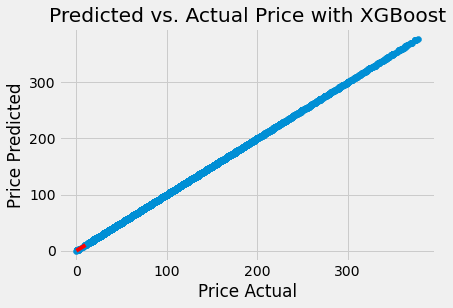

In [249]:
# Plot
plt.scatter(y_test, y_test_preds)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with XGBoost')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


X = final_listings_scaled_df
y = listings['price']

# Prepare the cross-validation procedure
# cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=15)

# Split into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# random_forest_regressor = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=15, n_jobs=-2)

# random_forest_regressor.fit(X_train, y_train.squeeze())
# y_pred = random_forest_regressor.predict(X_test)
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# scores = cross_val_score(random_forest_regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-2)
# print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

param_grid = {
    'bootstrap': [True, False],
    # Maximum number of levels in tree
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'criterion': ["squared_error", "absolute_error", "poisson"]
}
param_grid['max_depth'].append(None)
print(param_grid)

random_forest_regressor = RandomForestRegressor(n_jobs=-3)
# Instantiate the random search model
random_search = RandomizedSearchCV(estimator = random_forest_regressor, param_distributions= param_grid, n_iter = 100, cv = 3, n_jobs = -3, verbose = 2)

# Fit the grid search to the data
random_search.fit(X, y)

print(random_search.best_params_)

# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

# best_grid = random_search.best_estimator_
# grid_accuracy = evaluate(best_grid, X, y)